## **Iteration 1**

#### **Group Members**

**Ojo, Oluwaseun** | **Sholola, Oluwafunmiwo Judah**

#### **Context of Dataset and Goal Overview**

For our dataset, we settled on automotive data from MarketCheck spanning 8 years of inventory in Canada. Each record indicates the most recent online activity for a particular vehicle, obtained via webcrawlers that aggregate info retrieved from a vast number (~65k) of dealer websites. Online activity is not defined, but it is reasonably safe (based on the 'price' attribute provided) to assume that the records indicate sale listings (and not leases, or rentals).

According to the dataset's [Kaggle link](https://www.kaggle.com/datasets/3ea0a6a45dbd4713a8759988845f1a58038036d84515ded58f65a2ff2bd32e00?resource=download), it was last updated a year ago, so we can reasonably expect 2021 to be the upper limit for the year of car manufacture.

This dataset comprises some expected attributes such as the price, make, mileage and manufacturing year of the car. It also includes more specific (and potentially more interesting) attributes such as the fuel type, the engine size, the (corporate) dealer name and site of activity (zip and province).

While our exact goal is not settled upon just yet, as we have not studied the data in-depth enough to hone in on a single phenom, listed below are a few possible phenomenon that are in contention to be studied by us in future iterations:

* correlation of price to the make and year of a vehicle
* correlation of vehicle fuel type to sales (or frequency of sales, more specifically)
* the ideal car (or kind of car) to buy based on the age of vehicles
* the ideal province to buy a used car within Canada taking price and mileage into consideration

That said, let us dive in!


#### **Exploring the Data...**

Prior to importing our dataset, we quickly observe that the total number of records in the dataset and the number of unique VIN values **DO NOT** match. 

The reason for this disparity in the number of records and the VIN's is due to the fact that certain 
cars come up for sale multiple times within the collection window of the dataset (the past year), or they come multiple different dealer sites.

<img src="img\kaggle-id-vin.png" width="600" height="300">






In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_csv('ca-dealers-used.csv')

# confirming what we observe at a glance on Kaggle
df['vin'].describe()

C:\Users\Fshol\AppData\Local\Temp\ipykernel_14704\2541389031.py:5: DtypeWarning: Columns (13,15) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('ca-dealers-used.csv')


count                393603
unique               226691
top       5LMJJ2JT1KEL20643
freq                     21
Name: vin, dtype: object

#### **Index selection**

Logically, it makes sense to use either the **id** attribute (which is unique) or the **vin** attribute (which, ideally, would be unique in the dataset).

Since some VIN's pop up a few times in the dataset as a result of certain vehicles being traded multiple times, we have to decide:
* if we want to drop duplicate VIN's and simply represent each vehicle once throughout the dataframe, thus making the **vin** attribute unique and possible for use as the **index** of the dataframe; *or*
* if we want to keep multiple instances of a vehicle in the dataframe and utilize **id** as a single index, or **(id, vin)** as a MultiIndex **index** of the dataframe

We drop rows with duplicate **vin** as we do not require multiple instances of a vehicle for the purposes of our analysis. Subsequently, we set **id** attribute as our index. Even though we do not use **vin** as our index, we retain the attribute because it will serve us when plotting the distributions of ***non-numerical*** attributes.



In [2]:
# drop rows with duplicate VIN and set 'id' as our index
df_copy = df.copy()
df_copy = df_copy.drop_duplicates('vin')
df_copy = df_copy.reset_index(drop=True).set_index('id')

display(df_copy.head(5))

# # getting a basic, high-level overview
display(df_copy.info())

# # general description of numerical attributes in dataset
display(df_copy.describe())

,vin,price,miles,stock_no,year,make,model,trim,body_type,vehicle_type,drivetrain,transmission,fuel_type,engine_size,engine_block,seller_name,street,city,state,zip
id,,,,,,,,,,,,,,,,,,,,
b39ea795-eca9,19UNC1B01HY800062,179999.0,9966.0,V-P4139,2017.0,Acura,NSX,Base,Coupe,Car,4WD,Automatic,Electric / Premium Unleaded,3.5,V,edmundston honda,475 Rue Victoria,Edmundston,NB,E3V 2K7
026cb5b1-6e3e,19UNC1B02HY800023,179995.0,5988.0,PPAP70374,2017.0,Acura,NSX,Base,Coupe,Car,4WD,Automatic,Electric / Premium Unleaded,3.5,V,garage daniel lessard,2795 Route-du-prsident-kennedy,Notre-dame-des-pins,QC,G0M 1K0
5cd5d5b2-5cc2,19UNC1B02HY800071,168528.0,24242.0,B21085,2017.0,Acura,NSX,Base,Coupe,Car,4WD,Automatic,Electric / Premium Unleaded,3.5,V,lougheed acura,1388 Lougheed Highway,Coquitlam,BC,V3K 6S4
b32473ed-5922,19UNC1B02LY800001,220000.0,6637.0,AP5333,2020.0,Acura,NSX,Base,Coupe,Car,4WD,Automatic,Electric / Premium Unleaded,3.5,V,drive autogroup,1305 Parkway Suite 600,Pickering,ON,L1V 3P2
0487af07-893c,19UNC1B03HY800063,155771.0,18281.0,U02856,2017.0,Acura,NSX,Base,Coupe,Car,4WD,Automatic,Electric / Premium Unleaded,3.5,V,gravel auto crdit,102-1007 Boulevard Ren Lvesque Verdun,Montral,QC,H3E 0H1


<class 'pandas.core.frame.DataFrame'>
Index: 226691 entries, b39ea795-eca9 to 479607ed-62af
Data columns (total 20 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   vin           226691 non-null  object 
 1   price         203832 non-null  float64
 2   miles         214003 non-null  float64
 3   stock_no      210828 non-null  object 
 4   year          226678 non-null  float64
 5   make          226691 non-null  object 
 6   model         223824 non-null  object 
 7   trim          199775 non-null  object 
 8   body_type     206027 non-null  object 
 9   vehicle_type  203775 non-null  object 
 10  drivetrain    200702 non-null  object 
 11  transmission  201979 non-null  object 
 12  fuel_type     181432 non-null  object 
 13  engine_size   180550 non-null  float64
 14  engine_block  180131 non-null  object 
 15  seller_name   225486 non-null  object 
 16  street        222762 non-null  object 
 17  city          222865 non-null  obj

None

,price,miles,year,engine_size
count,2.038320e+05,2.140030e+05,226678.000000,180550.000000
mean,2.541799e+04,7.999847e+04,2016.020972,2.784155
std,2.128191e+04,6.075388e+04,3.609585,1.229094
min,0.000000e+00,0.000000e+00,1981.000000,0.600000
25%,1.399500e+04,3.657100e+04,2014.000000,2.000000
50%,2.099500e+04,6.643900e+04,2017.000000,2.400000
75%,3.149500e+04,1.120000e+05,2018.000000,3.500000
max,1.288888e+06,2.300033e+06,2022.000000,8.400000


#### **Inclusion of an Additional (Derived) Column**

We decided to derive a new column, **age**, based off the manufacturing **year**, which we use to prune off vehicles that fall outside a specific range. It is important to note that this is not a trimming off of outliers, rather we are choosing deal *only* with cars that were manufactured *more recently*.

This attribute might also come in handy in extracting useful features, such as the relationship between the manufacturing **year** of vehicles and the **frequency** (number) of sales.

Ages Before
Oldest: 41.0
Newest: 0.0
<class 'pandas.core.frame.DataFrame'>
Index: 226691 entries, b39ea795-eca9 to 479607ed-62af
Data columns (total 21 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   vin           226691 non-null  object 
 1   price         203832 non-null  float64
 2   miles         214003 non-null  float64
 3   stock_no      210828 non-null  object 
 4   year          226678 non-null  float64
 5   make          226691 non-null  object 
 6   model         223824 non-null  object 
 7   trim          199775 non-null  object 
 8   body_type     206027 non-null  object 
 9   vehicle_type  203775 non-null  object 
 10  drivetrain    200702 non-null  object 
 11  transmission  201979 non-null  object 
 12  fuel_type     181432 non-null  object 
 13  engine_size   180550 non-null  float64
 14  engine_block  180131 non-null  object 
 15  seller_name   225486 non-null  object 
 16  street        222762 non-null  object 
 1

None

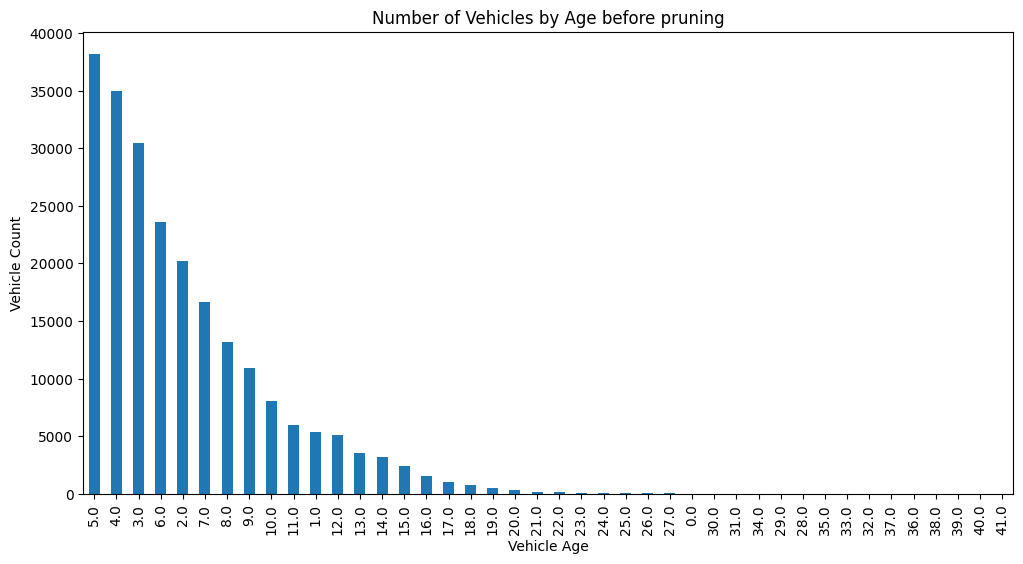

Ages After
Oldest: 15.0
Newest: 0.0
<class 'pandas.core.frame.DataFrame'>
Index: 221742 entries, b39ea795-eca9 to 479607ed-62af
Data columns (total 21 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   vin           221742 non-null  object 
 1   price         200716 non-null  float64
 2   miles         209571 non-null  float64
 3   stock_no      206538 non-null  object 
 4   year          221742 non-null  float64
 5   make          221742 non-null  object 
 6   model         219143 non-null  object 
 7   trim          196009 non-null  object 
 8   body_type     201738 non-null  object 
 9   vehicle_type  199542 non-null  object 
 10  drivetrain    196942 non-null  object 
 11  transmission  198074 non-null  object 
 12  fuel_type     178168 non-null  object 
 13  engine_size   177244 non-null  float64
 14  engine_block  176863 non-null  object 
 15  seller_name   220579 non-null  object 
 16  street        217941 non-null  object 
 17

None

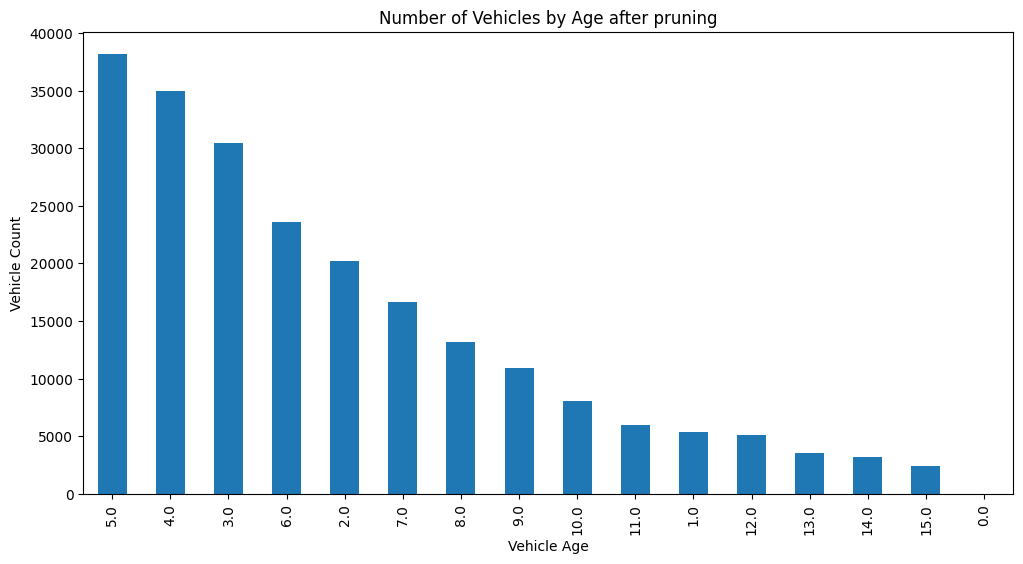

In [3]:
# creating age column to know the age of the vehicles in our dataset
df_copy['age'] = df_copy.year.apply(lambda x: 2022-x) 
print(f"Ages Before\nOldest: {df_copy['age'].max()}\nNewest: {df_copy['age'].min()}")
display(df_copy.info())

# """We will plot a line graph to see the number of vehicles by age in order to know if we should keep or drop
# rows based on the age of the vehicle"""

# Plotting the numbers of vehicles by year 
# From our plot, we can observe that the vehicles that are newer have higher numbers than older vehicles.
# We will therefore drop rows with older cars. We will work with cars between ages 1 - 15
df_copy['age'].value_counts().plot(kind='bar', figsize = (12, 6), title = 'Number of Vehicles by Age before pruning')
plt.xlabel('Vehicle Age')
plt.ylabel('Vehicle Count')
plt.show()

df_copy = df_copy[(df_copy['age']>= 0) & (df_copy['age'] <= 15)] # removing vehicles that are older than 20 years old
print(f"Ages After\nOldest: {df_copy['age'].max()}\nNewest: {df_copy['age'].min()}")
display(df_copy.info())

#Plotting the numbers of vehicles by year after removing older cars
df_copy['age'].value_counts().plot(kind='bar',figsize = (12, 6), title = 'Number of Vehicles by Age after pruning')
plt.xlabel('Vehicle Age')
plt.ylabel('Vehicle Count')
plt.show()

#### **Justification for dropping certain columns**

Our dataset came with quite a handful of attributes, but we chose to drop certain ones from the get-go. They are:
* **stock_no**
* **trim**
* **engine_block**
* **street**
* **zip**


The decision to drop these columns is moreso based on some domain knowledge and logic.

#### **stock_no:** 
This attribute is unique to each dealer's online inventory categorization system, and is not of a singular format; some are purely numeric in nature, while some are alphanumeric. As such, it is not extremely useful across diverse sources (dealers).

In [4]:
# display first 20 'stock_no' fields
display(df_copy['stock_no'].head(20))

id
b39ea795-eca9         V-P4139
026cb5b1-6e3e       PPAP70374
5cd5d5b2-5cc2          B21085
b32473ed-5922          AP5333
0487af07-893c          U02856
e39410c3-ef41         UC6386A
19549afd-1a64          200404
9bff56cb-9e20            CONS
e190cc9a-1062           P7172
031632fa-66c6    2017NSXWHITE
79d4a6a9-c265          MU2483
a7b53aaa-ae99             NaN
acdf10ba-fa76          215140
3ec82d01-aec0           30479
19cab0ff-35f0         KH6268B
d128f381-0f23     2008DAVGWHT
bcd6cd07-d086           95169
b241c836-6a57             NaN
6a88647d-ff1a        11024-21
072f8e65-1a4e       2M060(59)
Name: stock_no, dtype: object

#### **trim:** 
We decided to drop this attribute because of the sheer number of unique values it contains per **make**. It could lead to feature explosion.

In [5]:
display(df_copy.groupby('trim')['make'].describe())
display(sum(df_copy.groupby('trim')['make'].describe()['unique']))

display(df_copy.groupby('make')['trim'].describe())
display(sum(df_copy.groupby('make')['trim'].describe()['unique']))

,count,unique,top,freq
trim,,,,
+,115,11,Kia,74
- MT,1,1,Mazda,1
1,13,6,Honda,5
1.6 S,2,1,Nissan,2
1.8,248,2,Nissan,205
...,...,...,...,...
xDrive35i Premium,4,1,BMW,4
xDrive35i Sport Activity,1,1,BMW,1
xDrive40e,22,1,BMW,22


2428

,count,unique,top,freq
make,,,,
Acura,2568,57,Base,585
Alfa Romeo,138,7,Base,39
Am General,2,2,MV,1
Aston Martin,46,6,Base,37
Audi,4337,104,Premium,1179
BMW,8022,110,28i,1293
Bentley,90,4,Base,69
Buick,2298,45,Preferred,427
Cadillac,1361,28,Luxury,516


2428

#### **engine_block:** 
This is a low-level attribute that has **3** possible values:
* H-engine type
* I-engine type
* V-engine type

It is not a particularly desirable attribute for our purposes. 

Also, unlike some other attributes such as the manufacturing **year**, which can be decoded from the **VIN** and are uniform/standard across various vehicle manufacturers, the **engine_block** code in the VIN differs across manufacturers (**make**) and even across **models** within the same make. 

As such, it rapidly devolves into an arduous task in trying to retrieve an attribute that we, once again, do not view as useful to our goal(s).

In [6]:
display(df_copy.groupby('engine_block').count())

df_copy['engine_block'].describe()

,vin,price,miles,stock_no,year,make,model,trim,body_type,vehicle_type,drivetrain,transmission,fuel_type,engine_size,seller_name,street,city,state,zip,age
engine_block,,,,,,,,,,,,,,,,,,,,
H,2435,2160,2333,2278,2435,2435,2435,2435,2435,2435,2385,2383,2341,2435,2414,2401,2400,2401,2401,2435
I,112046,103202,106370,105114,112046,112046,112046,112046,112046,112046,112046,112046,112046,112046,111436,110173,110220,110210,110221,112046
V,62382,55677,58290,58563,62382,62382,62382,62382,62374,62378,62307,62303,62272,62382,62058,61123,61188,61181,61187,62382


count     176863
unique         3
top            I
freq      112046
Name: engine_block, dtype: object

##### **street** & **zip:**
These attributes are being dropped in favour of 2 other geo-based attributes, **city** and **state**.

#### **Proceeding to drop the unwanted columns and reordering our retained columns**

In [7]:
# specify the columns and drop them
col_to_drop = ['stock_no', 'trim', 'engine_block', 'street', 'zip']
df_copy = df_copy.drop(columns=col_to_drop)

# specify an order of columns and order them accordingly
order_of_cols = ['vin', 'make', 'model', 'year', 'age', 'miles', 'price', 'fuel_type', 'engine_size', 'body_type',  'vehicle_type', 'transmission', 'drivetrain', 'seller_name', 'city', 'state']
df_copy = df_copy[order_of_cols]

# rename state to province (more appropriate to Canada)
df_copy.rename(columns={'state' : 'province'}, inplace=True)

df_copy

,vin,make,model,year,age,miles,price,fuel_type,engine_size,body_type,vehicle_type,transmission,drivetrain,seller_name,city,province
id,,,,,,,,,,,,,,,,
b39ea795-eca9,19UNC1B01HY800062,Acura,NSX,2017.0,5.0,9966.0,179999.0,Electric / Premium Unleaded,3.5,Coupe,Car,Automatic,4WD,edmundston honda,Edmundston,NB
026cb5b1-6e3e,19UNC1B02HY800023,Acura,NSX,2017.0,5.0,5988.0,179995.0,Electric / Premium Unleaded,3.5,Coupe,Car,Automatic,4WD,garage daniel lessard,Notre-dame-des-pins,QC
5cd5d5b2-5cc2,19UNC1B02HY800071,Acura,NSX,2017.0,5.0,24242.0,168528.0,Electric / Premium Unleaded,3.5,Coupe,Car,Automatic,4WD,lougheed acura,Coquitlam,BC
b32473ed-5922,19UNC1B02LY800001,Acura,NSX,2020.0,2.0,6637.0,220000.0,Electric / Premium Unleaded,3.5,Coupe,Car,Automatic,4WD,drive autogroup,Pickering,ON
0487af07-893c,19UNC1B03HY800063,Acura,NSX,2017.0,5.0,18281.0,155771.0,Electric / Premium Unleaded,3.5,Coupe,Car,Automatic,4WD,gravel auto crdit,Montral,QC
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
a02fbcbc-9f63,WDC0G5EB7JV034017,Mercedes-Benz,GLC-Class,2018.0,4.0,68665.0,43900.0,Electric / Unleaded,2.0,SUV,Truck,Automatic,4WD,hyundai repentigny,Repentigny,QC
f71c5738-33d8,WDC0G5EB8KF614677,Mercedes-Benz,GLC-Class,2019.0,3.0,22108.0,47995.0,Electric / Unleaded,2.0,SUV,Truck,Automatic,4WD,mercedes-benz granby,Granby,QC
873d76f0-18d2,WDC0G5EB9JF465808,Mercedes-Benz,GLC-Class,2018.0,4.0,55316.0,42995.0,Electric / Unleaded,2.0,SUV,Truck,Automatic,4WD,groupe park avenue - regroupement automobile,Brossard,QC


### **Contextualization and Description of Variables**

Our dataset is the collection of inventory of used cars from various auto dealers across Canada. The data depicts the market activity of used cars sold by different dealers in the various provinces of Canada. The following are the variables in the dataset and their description:

**id** :    Unique identifier for each row.<br>
            *Data type: string*
            <br>
            <br>
**vin** :   17-character long vehicle identification number. This is the value that uniquely identify each vehicle.<br> 
            *Data type: string* 
            <br>
            <br>
**price** : Price of the vehicle. This is the value that we will try to predict.<br>
            *Data type: float* 
            <br>
            <br>
**miles** : Number of miles/odometer on the vehicle. The higher the number, the more the vehicle has been driven or used.<br>
            *Data type: float*
            <br>
            <br>
**year** :  Model year of the vehicle - Decoded from VIN. This is the year the vehicle was manufactured. <br>
            *Data type: float* 
            <br>
            <br>
**make** :  Make of the vehicle - Decoded from VIN. This is the manufacturer of the vehicle. <br>
            *Data type: string* 
            <br>
            <br>
**model** : Model of the vehicle - Decoded from VIN. It is the specific model of the vehicle. <br>
            *Data type: string* 
            <br>
            <br>
**body_type** : Body type of the vehicle - Decoded from VIN. This is the type of vehicle. For example, sedan, coupe, SUV, etc. <br>
            *Data type: string* 
            <br>
            <br>
**vehicle_type** : This is the type of vehicle. For example, car, truck, etc. <br>
            *Data type: string* 
            <br>
            <br>
**engine_size** : This is the size of the engine in liters. <br>
            *Data type: float*
            <br>
            <br>
**fuel_type** : This is the type of fuel the vehicle uses. For example, gasoline, diesel, etc. <br>
            *Data type: string* 
            <br>
            <br>
**transmission** : Transmission type of the vehicle. The transmission type is either automatic or manual. <br>
            *Data type: string* 
            <br>
            <br>
**drivetrain** : Drivetrain type of the vehicle. The drivetrain type is either 4WD, FWD, or RWD. <br>
            *Data type: string* 
            <br>
            <br>
**seller_name** : Name of the seller or dealership. <br>
            *Data type: string* 
            <br>
            <br>
**city** : City of the seller or dealership. <br>
            *Data type: string* 
            <br>
            <br>
**state** : State of the seller or dealership. <br>
            *Data type: string* 
            <br>
            <br>



#### **Filling in Missing Data**
Two attributes we decided on, for addressing missing data are:
* **price**
* **engine_size**

#### **price:**
only about 9% is missing from the original dataset, so we artificially introduced 6% more missing values into the dataset, to make 15% of missing values. For our baseline, we replace these missing values with the average price for the **make** and **model** of the vehicle.

In [8]:
# function to introduce NaN into random rows under a particular column
def add_NaN_random_rows(data, attribute, fraction):
    for col in data.columns:
        if col == attribute:
            data.loc[data.sample(frac=fraction).index, col] = np.nan

In [9]:
# save rows with missing price and drop from dataset
missing_price = df_copy[df_copy['price'].isna()].copy()
df_copy.dropna(subset=['price'], inplace=True)

# place/introduce NaN into 'price' column, on an additional random sample of 6% of our dataset, effectively mimicking missing data under the 'price' attribute
add_NaN_random_rows(df_copy, 'price', 0.06)                                                                   

# add newly generated rows with NaN to our stored rows with missing price
missing_price = pd.concat([missing_price, df_copy[df_copy['price'].isna()].copy()], axis=0)  
all_other_cols = (missing_price.columns).drop('price')
missing_price.dropna(subset=all_other_cols, inplace=True)                                               # drop rows with NaN in any other column
df_copy.dropna(subset=['price'], inplace=True)                                                          # drop these rows from our dataset
df_copy.drop(pd.Series(df_copy[df_copy['price']==0].index), axis=0, inplace=True)                       # drop rows with price==0

In [10]:
price_stats = df_copy.groupby(['make', 'model'])['price'].agg({'mean', 'median', pd.Series.mode})
display(price_stats)

# returns some centrality measure (mean, median or mode) of observed 'price' for a vehicle of ('make', 'model')
def fix_missing_price(make, model, c_measure):
    if (make, model) in price_stats.index:                                  # if (make, model) was observed in the original df; otherwise, we have no basis to estimate missing price
        return price_stats.loc[(make, model), c_measure]

missing_price['price'] = missing_price.apply(lambda x: fix_missing_price(x['make'], x['model'], 'mean'), axis=1)
missing_price.dropna(inplace=True)                                         # drop vehicles that didn't have a price estimate
display(missing_price[['price']])

median          mean  \
make  model                            
Acura 500       4998.0   4998.000000   
      CL        7955.0   7955.000000   
      CSX       7000.0   7119.750000   
      ILX      18490.0  19112.926154   
      Legend    4995.0   4995.000000   
...                ...           ...   
Volvo XC60     42995.0  40001.191406   
      XC70     12777.0  14152.400000   
      XC90     48995.0  46702.011730   
smart Sorento  23997.0  23997.000000   
      fortwo    7995.0   9225.872146   

                                                            mode  
make  model                                                       
Acura 500                                                 4998.0  
      CL                                                  7955.0  
      CSX                       [5480.0, 6500.0, 7500.0, 8999.0]  
      ILX                                                17995.0  
      Legend                                              4995.0  
...                                                          ...  
Volvo XC60                  [41995.0, 42995.0, 44995.0, 51943.0]  
      XC70     [4500.0, 6150.0, 7950.0, 8995.0, 8999.0, 9999....  
      XC90                                    [60998.0, 61990.0]  
smart Sorento                                            23997.0  
      fortwo                                              8800.0  

[900 rows x 3 columns]

,price
id,
79d4a6a9-c265,188460.000000
bcd6cd07-d086,7222.508772
1da10187-32e9,39412.826868
8cf8f9a0-2107,39412.826868
28f7b8ce-430a,38548.950495
...,...
4d2b5477-81b6,27141.258503
c2936657-a522,27141.258503
6c3412e0-ed58,27141.258503


#### **engine_size:**
About **18%** of values are missing from this attribute in the original dataset. The engine size can be derived from the VIN, but the encoding is unique to each manufacturer and also to the particular model of a vehicle, so using a dictionary would be expensive (memory-wise). As such, we utilize centrality measures (mode), based on categorization fo a related attribute, **body_type**, to fill missing values.

In [11]:
# we save a record of rows that are currently missing their engine_size 
# this way, we can compare our method of filling (using measures of centrality)
# to some engine_size values derived using some model
missing_engine_size = df_copy[df_copy['engine_size'].isna()]
all_other_cols = (df_copy.columns).drop('engine_size')
missing_engine_size.dropna(subset=all_other_cols, inplace=True)                 # remove rows with NaN in any other column
df_copy.dropna(subset=['engine_size'])                                          # drop these rows from our dataset 

C:\Users\Fshol\AppData\Local\Temp\ipykernel_14704\3313221280.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  missing_engine_size.dropna(subset=all_other_cols, inplace=True)                 # remove rows with NaN in any other column


,vin,make,model,year,age,miles,price,fuel_type,engine_size,body_type,vehicle_type,transmission,drivetrain,seller_name,city,province
id,,,,,,,,,,,,,,,,
b39ea795-eca9,19UNC1B01HY800062,Acura,NSX,2017.0,5.0,9966.0,179999.0,Electric / Premium Unleaded,3.5,Coupe,Car,Automatic,4WD,edmundston honda,Edmundston,NB
026cb5b1-6e3e,19UNC1B02HY800023,Acura,NSX,2017.0,5.0,5988.0,179995.0,Electric / Premium Unleaded,3.5,Coupe,Car,Automatic,4WD,garage daniel lessard,Notre-dame-des-pins,QC
b32473ed-5922,19UNC1B02LY800001,Acura,NSX,2020.0,2.0,6637.0,220000.0,Electric / Premium Unleaded,3.5,Coupe,Car,Automatic,4WD,drive autogroup,Pickering,ON
e39410c3-ef41,19UNC1B03HY800080,Acura,NSX,2017.0,5.0,17207.0,169998.0,Electric / Premium Unleaded,3.5,Coupe,Car,Automatic,4WD,woodbine chrysler ltd,Markham,ON
19549afd-1a64,19UNC1B04LY800016,Acura,NSX,2020.0,2.0,579.0,205000.0,Electric / Premium Unleaded,3.5,Coupe,Car,Automatic,4WD,acura of hamilton,Hamilton,ON
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
a02fbcbc-9f63,WDC0G5EB7JV034017,Mercedes-Benz,GLC-Class,2018.0,4.0,68665.0,43900.0,Electric / Unleaded,2.0,SUV,Truck,Automatic,4WD,hyundai repentigny,Repentigny,QC
f71c5738-33d8,WDC0G5EB8KF614677,Mercedes-Benz,GLC-Class,2019.0,3.0,22108.0,47995.0,Electric / Unleaded,2.0,SUV,Truck,Automatic,4WD,mercedes-benz granby,Granby,QC
873d76f0-18d2,WDC0G5EB9JF465808,Mercedes-Benz,GLC-Class,2018.0,4.0,55316.0,42995.0,Electric / Unleaded,2.0,SUV,Truck,Automatic,4WD,groupe park avenue - regroupement automobile,Brossard,QC


In [12]:
import random

engine_size_stats = df_copy.groupby('body_type')['engine_size'].agg({'mean', 'median', pd.Series.mode})
display(engine_size_stats)

# returns some centrality measure (mean or median) of observed 'engine_sizes' for a vehicle of a certain 'body_type'
def fix_missing_engine_size(body_type, c_measure) :
    if type(engine_size_stats.loc[body_type, c_measure]) != np.float64:     # if engine_size is multi-modal (an array), randomly pick one of the modes
        return engine_size_stats.loc[body_type, c_measure][random.randint(0, len(engine_size_stats.loc[body_type, c_measure])-1)]
    else: return engine_size_stats.loc[body_type, c_measure]                # if engine_size of body_type has single mode

# replace missing engine_size with some measure of centrality
missing_engine_size['engine_size'] = missing_engine_size.apply(lambda x : fix_missing_engine_size(x['body_type'], 'mode'), axis=1)
missing_engine_size.dropna()                                                # drop vehicles that didn't have an engine_size estimate
display(missing_engine_size)

,median,mean,mode
body_type,,,
Car Van,2.4,2.282105,2.5
Cargo Van,3.7,3.855317,2.0
Chassis Cab,6.6,6.132500,6.7
Combi,2.0,2.210000,2.0
Commercial Wagon,1.6,1.600000,1.6
Convertible,3.0,3.425627,3.0
Coupe,3.0,3.175689,2.0
Crossover,2.5,2.667143,2.0
Cutaway,6.0,5.923704,6.0


C:\Users\Fshol\AppData\Local\Temp\ipykernel_14704\3708844419.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  missing_engine_size['engine_size'] = missing_engine_size.apply(lambda x : fix_missing_engine_size(x['body_type'], 'mode'), axis=1)


,vin,make,model,year,age,miles,price,fuel_type,engine_size,body_type,vehicle_type,transmission,drivetrain,seller_name,city,province
id,,,,,,,,,,,,,,,,
d295eb75-3688,1G1RE6E46EU153062,Chevrolet,Volt,2014.0,8.0,145578.0,11975.0,Electric / Premium Unleaded,2.0,Sedan,Car,Automatic,FWD,auto sur commande rive-nord,Saint-joseph-du-lac,QC
a0dd2860-aac1,JTDBVRBD0HA002013,Toyota,Mirai,2017.0,5.0,49000.0,15900.0,Electric / Hydrogen,2.0,Sedan,Car,Automatic,FWD,lp auto,Richmond,BC
78af3839-df97,JTDBVRBD2GA000388,Toyota,Mirai,2016.0,6.0,20000.0,21998.0,Electric / Hydrogen,2.0,Sedan,Car,Automatic,FWD,west coast auto group,Pitt Meadows,BC
835fe8e0-1394,JTDBVRBD9GA000436,Toyota,Mirai,2016.0,6.0,40457.0,14000.0,Electric / Hydrogen,2.0,Sedan,Car,Automatic,FWD,rocky mountain dodge chrysler jeep ram,Rocky Mountain House,AB
4b77942b-0ce6,JTDBVRBD9GA000582,Toyota,Mirai,2016.0,6.0,36396.0,18700.0,Electric / Hydrogen,2.0,Sedan,Car,Automatic,FWD,i autohaus sales & leasing,Richmond,BC
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2e0e0037-5533,1G1YE3D7XF5105646,Chevrolet,Corvette,2015.0,7.0,6401.0,73458.0,Premium Unleaded,3.0,Convertible,Car,Manual,RWD,adrenalin motors,Sylvan Lake,AB
caec39a0-c733,WDDGJ7HB7DF999686,Mercedes-Benz,C-Class,2013.0,9.0,83849.0,37950.0,Premium Unleaded,2.0,Coupe,Car,Automatic,RWD,automobiles ral parent inc,Qubec,QC
f8c8f411-8baf,WDDPK6GA2HF135960,Mercedes-Benz,SLC Roadster,2017.0,5.0,6621.0,41800.0,Premium Unleaded,2.7,Roadster,Car,Automatic,RWD,ed autos,Sainte-marie,QC


#### **Handling Outliers**
Let's get a preview of our outliers.

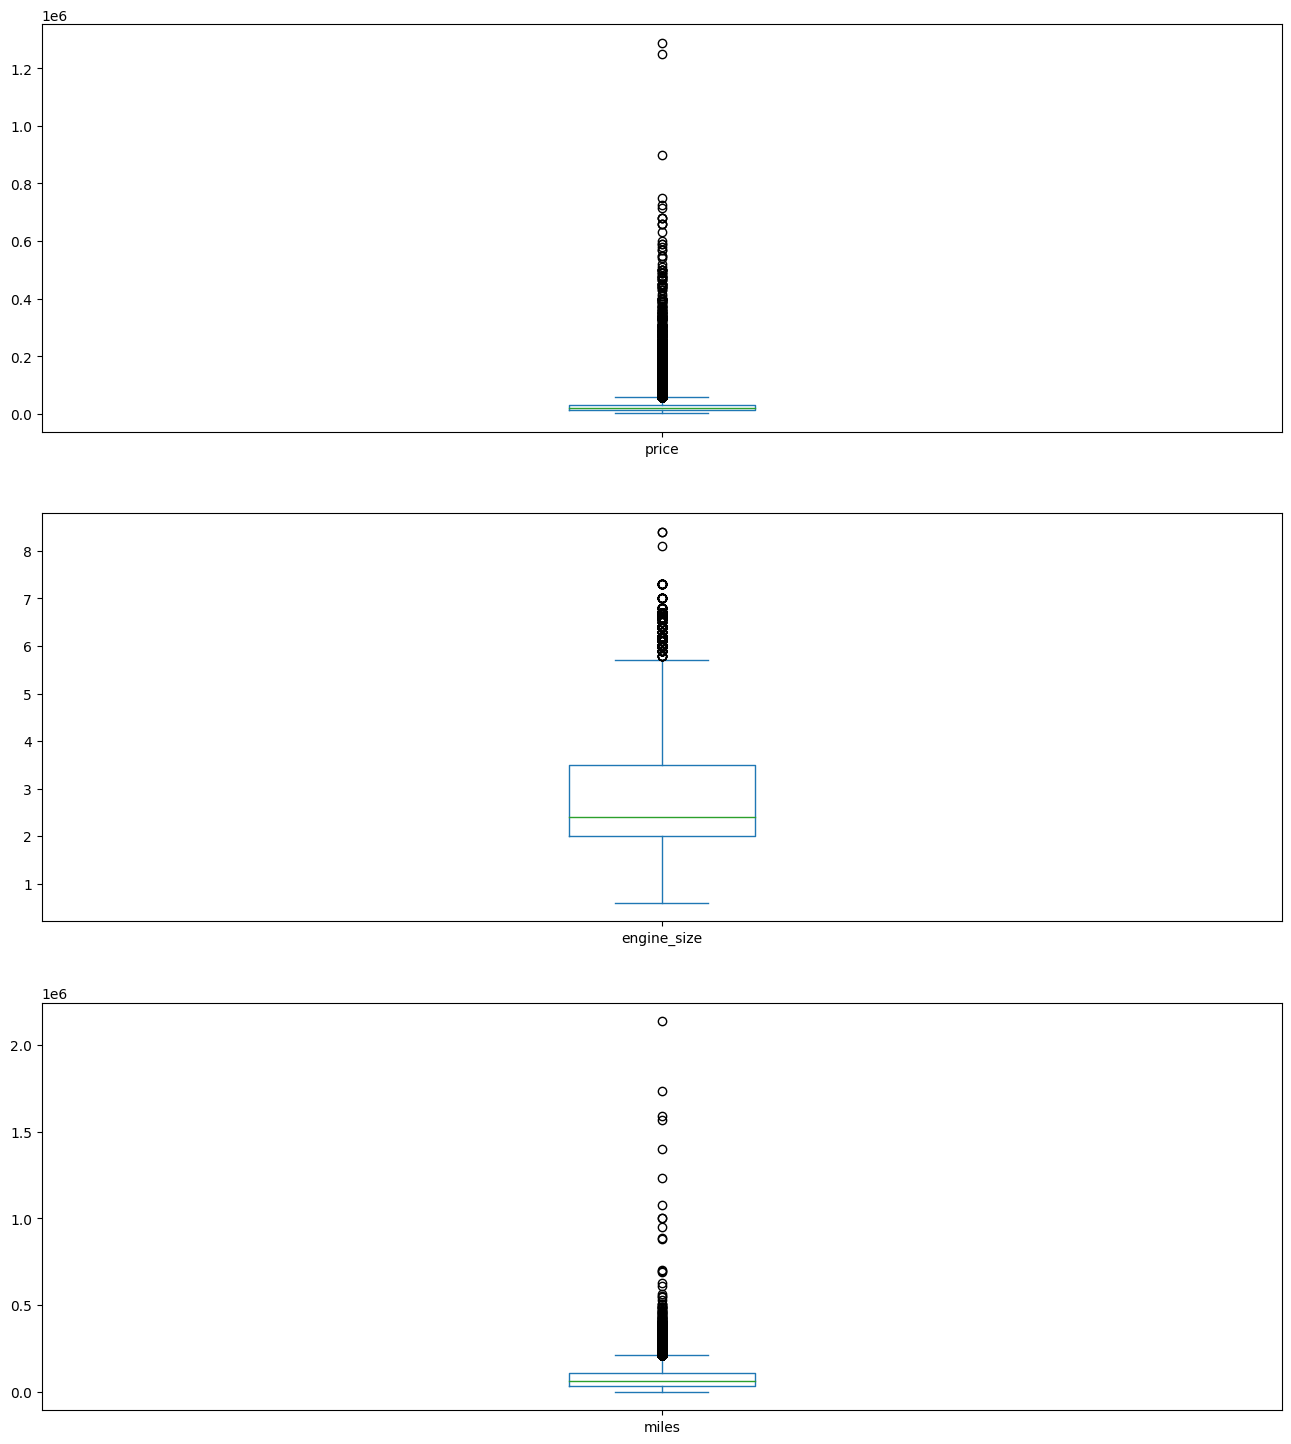

In [13]:
def plot_box(df, columns):
    fig, axs = plt.subplots(len(columns),1,figsize=(16,18))
    i = 0
    for c in columns:
        df[c].plot.box(ax=axs[i])
        i+=1

col_with_outliers = ['price', 'engine_size', 'miles']
plot_box(df_copy, col_with_outliers)

We have 3 attributes with outliers but we decided to  handle **price** and **engine_size** as we did with the missing values:

First, we save a copy of the rows with outliers under these attributes (for later comparison to forecasted values from our models). Next, we fix these outliers using **min** and **max** values.

So for outlier **price**, we replace the *lower outliers* with the **min price** and the *upper outliers* with the **max price** associated with the specific **make** and **model** of the vehicle.

And for outlier **engine_size** values, we replace the *lower outliers* with the **min engine_size** and the *upper outliers* with the **max engine_size**.

In [14]:
def retrieve_outliers(data, col, method):
    if method=='iqr' or method==None:
        q25 = data[col].quantile(0.25)                      
        q75 = data[col].quantile(0.75)
        iqr = q75 - q25
        lower_bound = 0 if q25 - (1.5 * iqr) < 0 else q25 - (1.5 * iqr)
        upper_bound = q75 + (1.5 * iqr)
    elif method=='std':
        lower_bound = data[col].mean() - (3 * data[col].std())
        upper_bound = data[col].mean() + (3 * data[col].std())
    
    return data[(data[col] < lower_bound) | (data[col] > upper_bound)]

In [15]:
def fix_outliers_price(price, make, model, q25, q75) :
    iqr = q75 - q25  
    lower_bound = 0 if q25 - (1.5 * iqr) < 0 else q25 - (1.5 * iqr)
    upper_bound = q75 + (1.5*iqr)

    # if (make, model) was observed in the original df; otherwise, we have no basis to estimate missing price
    if (make, model) in price_stats.index:
        if price < lower_bound:
            return price_stats.loc[(make, model), 'min']
        elif price > upper_bound:
            return price_stats.loc[(make, model), 'max']

q25_price = df_copy['price'].quantile(0.25)
q75_price = df_copy['price'].quantile(0.75)

outliers_price = retrieve_outliers(df_copy, 'price', 'iqr')
df_copy.drop(pd.Series(outliers_price.index), axis=0, inplace=True)
price_stats = df_copy.groupby(['make', 'model'])['price'].agg({'min', 'max'})

outliers_price['price'] = outliers_price.apply(lambda x : fix_outliers_price(x['price'], x['make'], x['model'], q25_price, q75_price), axis=1)
outliers_price.dropna(inplace=True)
display(outliers_price)

C:\Users\Fshol\AppData\Local\Temp\ipykernel_14704\3430434526.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outliers_price['price'] = outliers_price.apply(lambda x : fix_outliers_price(x['price'], x['make'], x['model'], q25_price, q75_price), axis=1)
C:\Users\Fshol\AppData\Local\Temp\ipykernel_14704\3430434526.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outliers_price.dropna(inplace=True)


,vin,make,model,year,age,miles,price,fuel_type,engine_size,body_type,vehicle_type,transmission,drivetrain,seller_name,city,province
id,,,,,,,,,,,,,,,,
0fd1e468-48c8,1FTEW1E50JFC58466,Ford,F-150,2018.0,4.0,82912.0,58432.0,Unleaded / Unleaded,5.0,Pickup,Truck,Automatic,4WD,blackstock ford lincoln,Orangeville,ON
e6adcd46-fb74,1FTEW1E50JKE61865,Ford,F-150,2018.0,4.0,1074110.0,58432.0,Unleaded / Unleaded,5.0,Pickup,Truck,Automatic,4WD,moose jaw ford,Moose Jaw,SK
317f5475-fb34,1FTEW1E54JKF96475,Ford,F-150,2018.0,4.0,41100.0,58432.0,Unleaded / Unleaded,5.0,Pickup,Truck,Automatic,4WD,car central,Barrie,ON
333c7bfa-a0a3,1FTEW1E55JFA66332,Ford,F-150,2018.0,4.0,39566.0,58432.0,Unleaded / Unleaded,5.0,Pickup,Truck,Automatic,4WD,abc automobiles inc.,Gatineau,QC
719a21c5-194a,1FTEW1E59JFC34442,Ford,F-150,2018.0,4.0,38475.0,58432.0,Unleaded / Unleaded,5.0,Pickup,Truck,Automatic,4WD,a & b ford service,Perth,ON
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
420ed343-ca7e,SALZM2GX5LH086284,Land Rover,Range Rover Evoque,2020.0,2.0,8512.0,57900.0,Electric / Unleaded,2.0,SUV,Truck,Automatic,4WD,land rover waterloo,Waterloo,ON
50a2d043-54be,SALZM2GX6LH035926,Land Rover,Range Rover Evoque,2020.0,2.0,16300.0,57900.0,Electric / Unleaded,2.0,SUV,Truck,Automatic,4WD,desjardins jaguar land rover,Quebec,QC
4d4525cf-b98d,SALZM2GX8LH035927,Land Rover,Range Rover Evoque,2020.0,2.0,22352.0,57900.0,Electric / Unleaded,2.0,SUV,Truck,Automatic,4WD,jaguar toronto,Toronto,ON


In [16]:
def fix_outliers_engine_size(engine_size, body_type, q25, q75) :

    iqr = q75 - q25
    lower_bound = q25 - (1.5*iqr)
    upper_bound = q75 + (1.5*iqr)

    if engine_size < lower_bound:
        return engine_size_stats.loc[body_type, 'min']
    elif engine_size > upper_bound:
        return engine_size_stats.loc[body_type, 'max']

q25_engine_size = df_copy['engine_size'].quantile(0.25)
q75_engine_size = df_copy['engine_size'].quantile(0.75)

outliers_engine_size = retrieve_outliers(df_copy, 'engine_size', 'iqr')
df_copy.drop(pd.Series(outliers_engine_size.index), axis=0, inplace=True)
engine_size_stats = df_copy.groupby('body_type')['engine_size'].agg({'min', 'max'})

outliers_engine_size['engine_size'] = outliers_engine_size.apply(lambda x : fix_outliers_engine_size(x['engine_size'], x['body_type'], q25_engine_size, q75_engine_size), axis=1)
outliers_engine_size.dropna(inplace=True)
display(outliers_engine_size)

C:\Users\Fshol\AppData\Local\Temp\ipykernel_14704\4106587981.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outliers_engine_size['engine_size'] = outliers_engine_size.apply(lambda x : fix_outliers_engine_size(x['engine_size'], x['body_type'], q25_engine_size, q75_engine_size), axis=1)
C:\Users\Fshol\AppData\Local\Temp\ipykernel_14704\4106587981.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outliers_engine_size.dropna(inplace=True)


,vin,make,model,year,age,miles,price,fuel_type,engine_size,body_type,vehicle_type,transmission,drivetrain,seller_name,city,province
id,,,,,,,,,,,,,,,,
122b168b-003b,1GAWGFFBXL1125936,Chevrolet,Express Passenger,2020.0,2.0,21861.0,49900.0,Compressed Natural Gas / Lpg,5.6,Passenger Van,Truck,Automatic,RWD,mcgee motors ltd,Goderich,ON
d7007f7a-10e9,1GAZGNFB0J1263103,Chevrolet,Express Passenger,2018.0,4.0,124532.0,31999.0,Compressed Natural Gas / Lpg,5.6,Passenger Van,Truck,Automatic,RWD,gmm auto sales,Toronto,ON
0a5ecad3-aa7d,1GC1KVEB7FF150084,Chevrolet,Silverado 2500HD,2015.0,7.0,201297.0,27999.0,Compressed Natural Gas / Unleaded,5.7,Pickup,Truck,Automatic,4WD,gmm auto sales,Toronto,ON
1a66c20f-73f4,1GCHK23618F122755,Chevrolet,Silverado 2500HD,2008.0,14.0,486471.0,19980.0,Biodiesel,5.7,Pickup,Truck,Automatic,4WD,brightdrive,Edmonton,AB
62ac577a-94ef,1GCHK23657F511638,Chevrolet,Silverado 2500HD,2007.0,15.0,257778.0,23995.0,Biodiesel,5.7,Pickup,Truck,Automatic,4WD,tiger auto sales ltd.,Unit A,ON
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
d311b131-7c4b,3GCUCUEJ1BG176121,Chevrolet,Silverado 1500,2011.0,11.0,211000.0,10500.0,Electric / Unleaded,5.7,Pickup,Truck,Automatic,RWD,arta auto sales,Toronto,ON
971440de-e1c7,3GCUCUEJ6BG175868,Chevrolet,Silverado 1500,2011.0,11.0,58901.0,18999.0,Electric / Unleaded,5.7,Pickup,Truck,Automatic,RWD,toronto best auto,Toronto,ON
3d53551c-e172,3GCUCUEJ6BG177085,Chevrolet,Silverado 1500,2011.0,11.0,195200.0,11995.0,Electric / Unleaded,5.7,Pickup,Truck,Automatic,RWD,lovely auto sales - used car sales in hamilton...,Hamilton,ON


After storing and fixing these outliers, we remove them from our clean dataset. 

We also drop all outliers under the **miles** attribute without storing them; the rationalization here is that there isn't really a reasonable way or justifiable basis upon which to 'fix' outlier **miles**. Do we use the age of the car, or its price or its make/model to determine what the mileage could be? None of these is a great way to properly estimate replacements for the outlier **miles**.

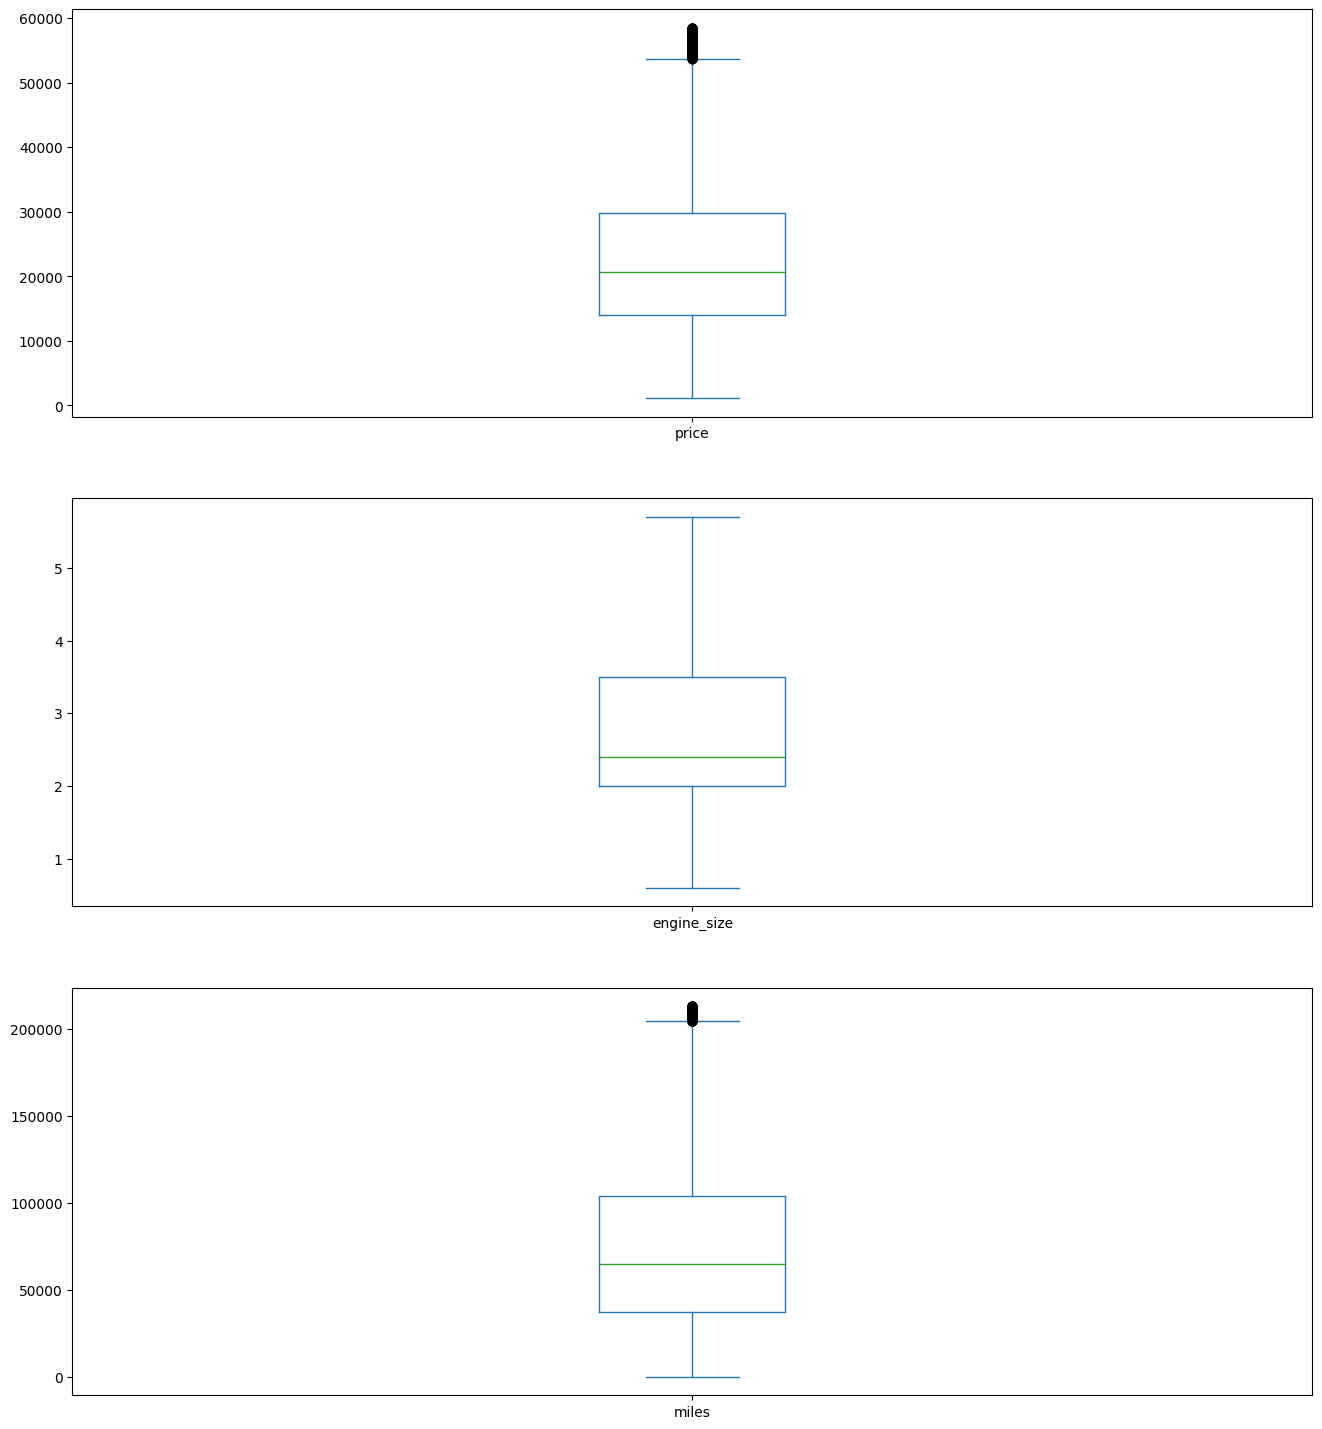

In [17]:
outliers_miles = retrieve_outliers(df_copy, 'miles', 'iqr')
df_copy.drop(pd.Series(outliers_miles.index), axis=0, inplace=True)
plot_box(df_copy, ['price', 'engine_size', 'miles'])

### Final Cleanup

Finally, we drop the rows with **outliers** and **missing values** from certain columns:
* **vin** : fundamental attribute, cannot be retrieved from others
* **miles** : cannot be retrieved from any other columns
* **model** : is obfuscated in VIN (not a 1-to-1 mapping) since it varies across manufacturers (makes)
* **body_type** : is also obfuscated in VIN (unique to each make); if missing for a particular model of a make, cannot be retrieved from other models
* **city** : even if seller_name is available, if city is missing, it is missing in all instances of seller_name (available or also missing)  
* **province** : same reason as city


In [18]:
# get a preview of the state of the dataset prior to dropping other NaN rows
print(f'State of the Dataset before dropping any rows...')
display(df_copy.info())

# we drop rows missing values from certain columns
df_copy.dropna(inplace=True)

# preview after dropping some rows based on above conditions
print(f'State of the Dataset after dropping some rows...')
display(df_copy.info())

State of the Dataset before dropping any rows...
<class 'pandas.core.frame.DataFrame'>
Index: 174649 entries, a7b53aaa-ae99 to 873d76f0-18d2
Data columns (total 16 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   vin           174649 non-null  object 
 1   make          174649 non-null  object 
 2   model         172746 non-null  object 
 3   year          174649 non-null  float64
 4   age           174649 non-null  float64
 5   miles         165742 non-null  float64
 6   price         174649 non-null  float64
 7   fuel_type     140210 non-null  object 
 8   engine_size   139460 non-null  float64
 9   body_type     158336 non-null  object 
 10  vehicle_type  156489 non-null  object 
 11  transmission  156565 non-null  object 
 12  drivetrain    155771 non-null  object 
 13  seller_name   173740 non-null  object 
 14  city          172178 non-null  object 
 15  province      172137 non-null  object 
dtypes: float64(5), object(11)
mem

None

State of the Dataset after dropping some rows...
<class 'pandas.core.frame.DataFrame'>
Index: 129828 entries, a7b53aaa-ae99 to 873d76f0-18d2
Data columns (total 16 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   vin           129828 non-null  object 
 1   make          129828 non-null  object 
 2   model         129828 non-null  object 
 3   year          129828 non-null  float64
 4   age           129828 non-null  float64
 5   miles         129828 non-null  float64
 6   price         129828 non-null  float64
 7   fuel_type     129828 non-null  object 
 8   engine_size   129828 non-null  float64
 9   body_type     129828 non-null  object 
 10  vehicle_type  129828 non-null  object 
 11  transmission  129828 non-null  object 
 12  drivetrain    129828 non-null  object 
 13  seller_name   129828 non-null  object 
 14  city          129828 non-null  object 
 15  province      129828 non-null  object 
dtypes: float64(5), object(11)
mem

None

#### **Sub-sampling to create working dataset**

Once we have dropped duplicate records, filled in missing data and taken care of outliers, it's finally time to select a sub-sample of our still dirty, but *slightly* cleaned, dataset.

For this, we created a random sampler. Given the size of our initial dataset, and the size of the desired sample, it creates bins of roughly same sizes and randomly selects indices from each of these bins. These indices correspond to the indices of rows we will select from our main dataset, which we then proceed to select.

In [19]:
# generates and returns a random sample of indices [0...n-1] of length, size_sub_df
from math import trunc

def random_sampler(size_initial_df,  size_sub_df):
    bin_size = trunc(size_initial_df/size_sub_df)
    sample_indices = []
    low = 0
    high = 1

    for i in range(0, size_sub_df):
        sample_indices.append(np.random.randint((low*bin_size), (high*bin_size)))
        low+=1
        high+=1

    return sample_indices

# generate a list of 1500 random indices between 0 and n-1; n=len(df)
sample_indices = random_sampler(len(df_copy), 1500)

# use generated indices to sample initial dataframe and create and subset
df_sub = df_copy.iloc[sample_indices, :].copy()
df_sub.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1500 entries, 7808a9b4-ac08 to a9738b04-32bc
Data columns (total 16 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   vin           1500 non-null   object 
 1   make          1500 non-null   object 
 2   model         1500 non-null   object 
 3   year          1500 non-null   float64
 4   age           1500 non-null   float64
 5   miles         1500 non-null   float64
 6   price         1500 non-null   float64
 7   fuel_type     1500 non-null   object 
 8   engine_size   1500 non-null   float64
 9   body_type     1500 non-null   object 
 10  vehicle_type  1500 non-null   object 
 11  transmission  1500 non-null   object 
 12  drivetrain    1500 non-null   object 
 13  seller_name   1500 non-null   object 
 14  city          1500 non-null   object 
 15  province      1500 non-null   object 
dtypes: float64(5), object(11)
memory usage: 199.2+ KB


#### **Plotting the distributions of our attributes**

In [20]:
def plot_histograms_boxplot_density(data, cols):
    if cols==-1: cols = (data.columns).drop('vin')
    fig, axs = plt.subplots(len(cols), 2, figsize=(30, 30))
    axs = axs.flatten()
    i=0

    for c in cols:
        if type(data[c][0]) == np.float64:
            data[c].hist(ax=axs[i], density=True)
            data[c].plot.density(ax=axs[i], title=c)
            data[c].plot.box(ax=axs[i+1])
            i+=2
        else:
            data.groupby(c).agg({'count'})['vin'].hist(ax=axs[i], density=True)
            data.groupby(c).agg({'count'})['vin'].plot.density(ax=axs[i], title=c)
            data.groupby(c).agg({'count'})['vin'].plot.box(ax=axs[i+1], title=c)
            i+=2

type(df_sub['vin'][0])

str

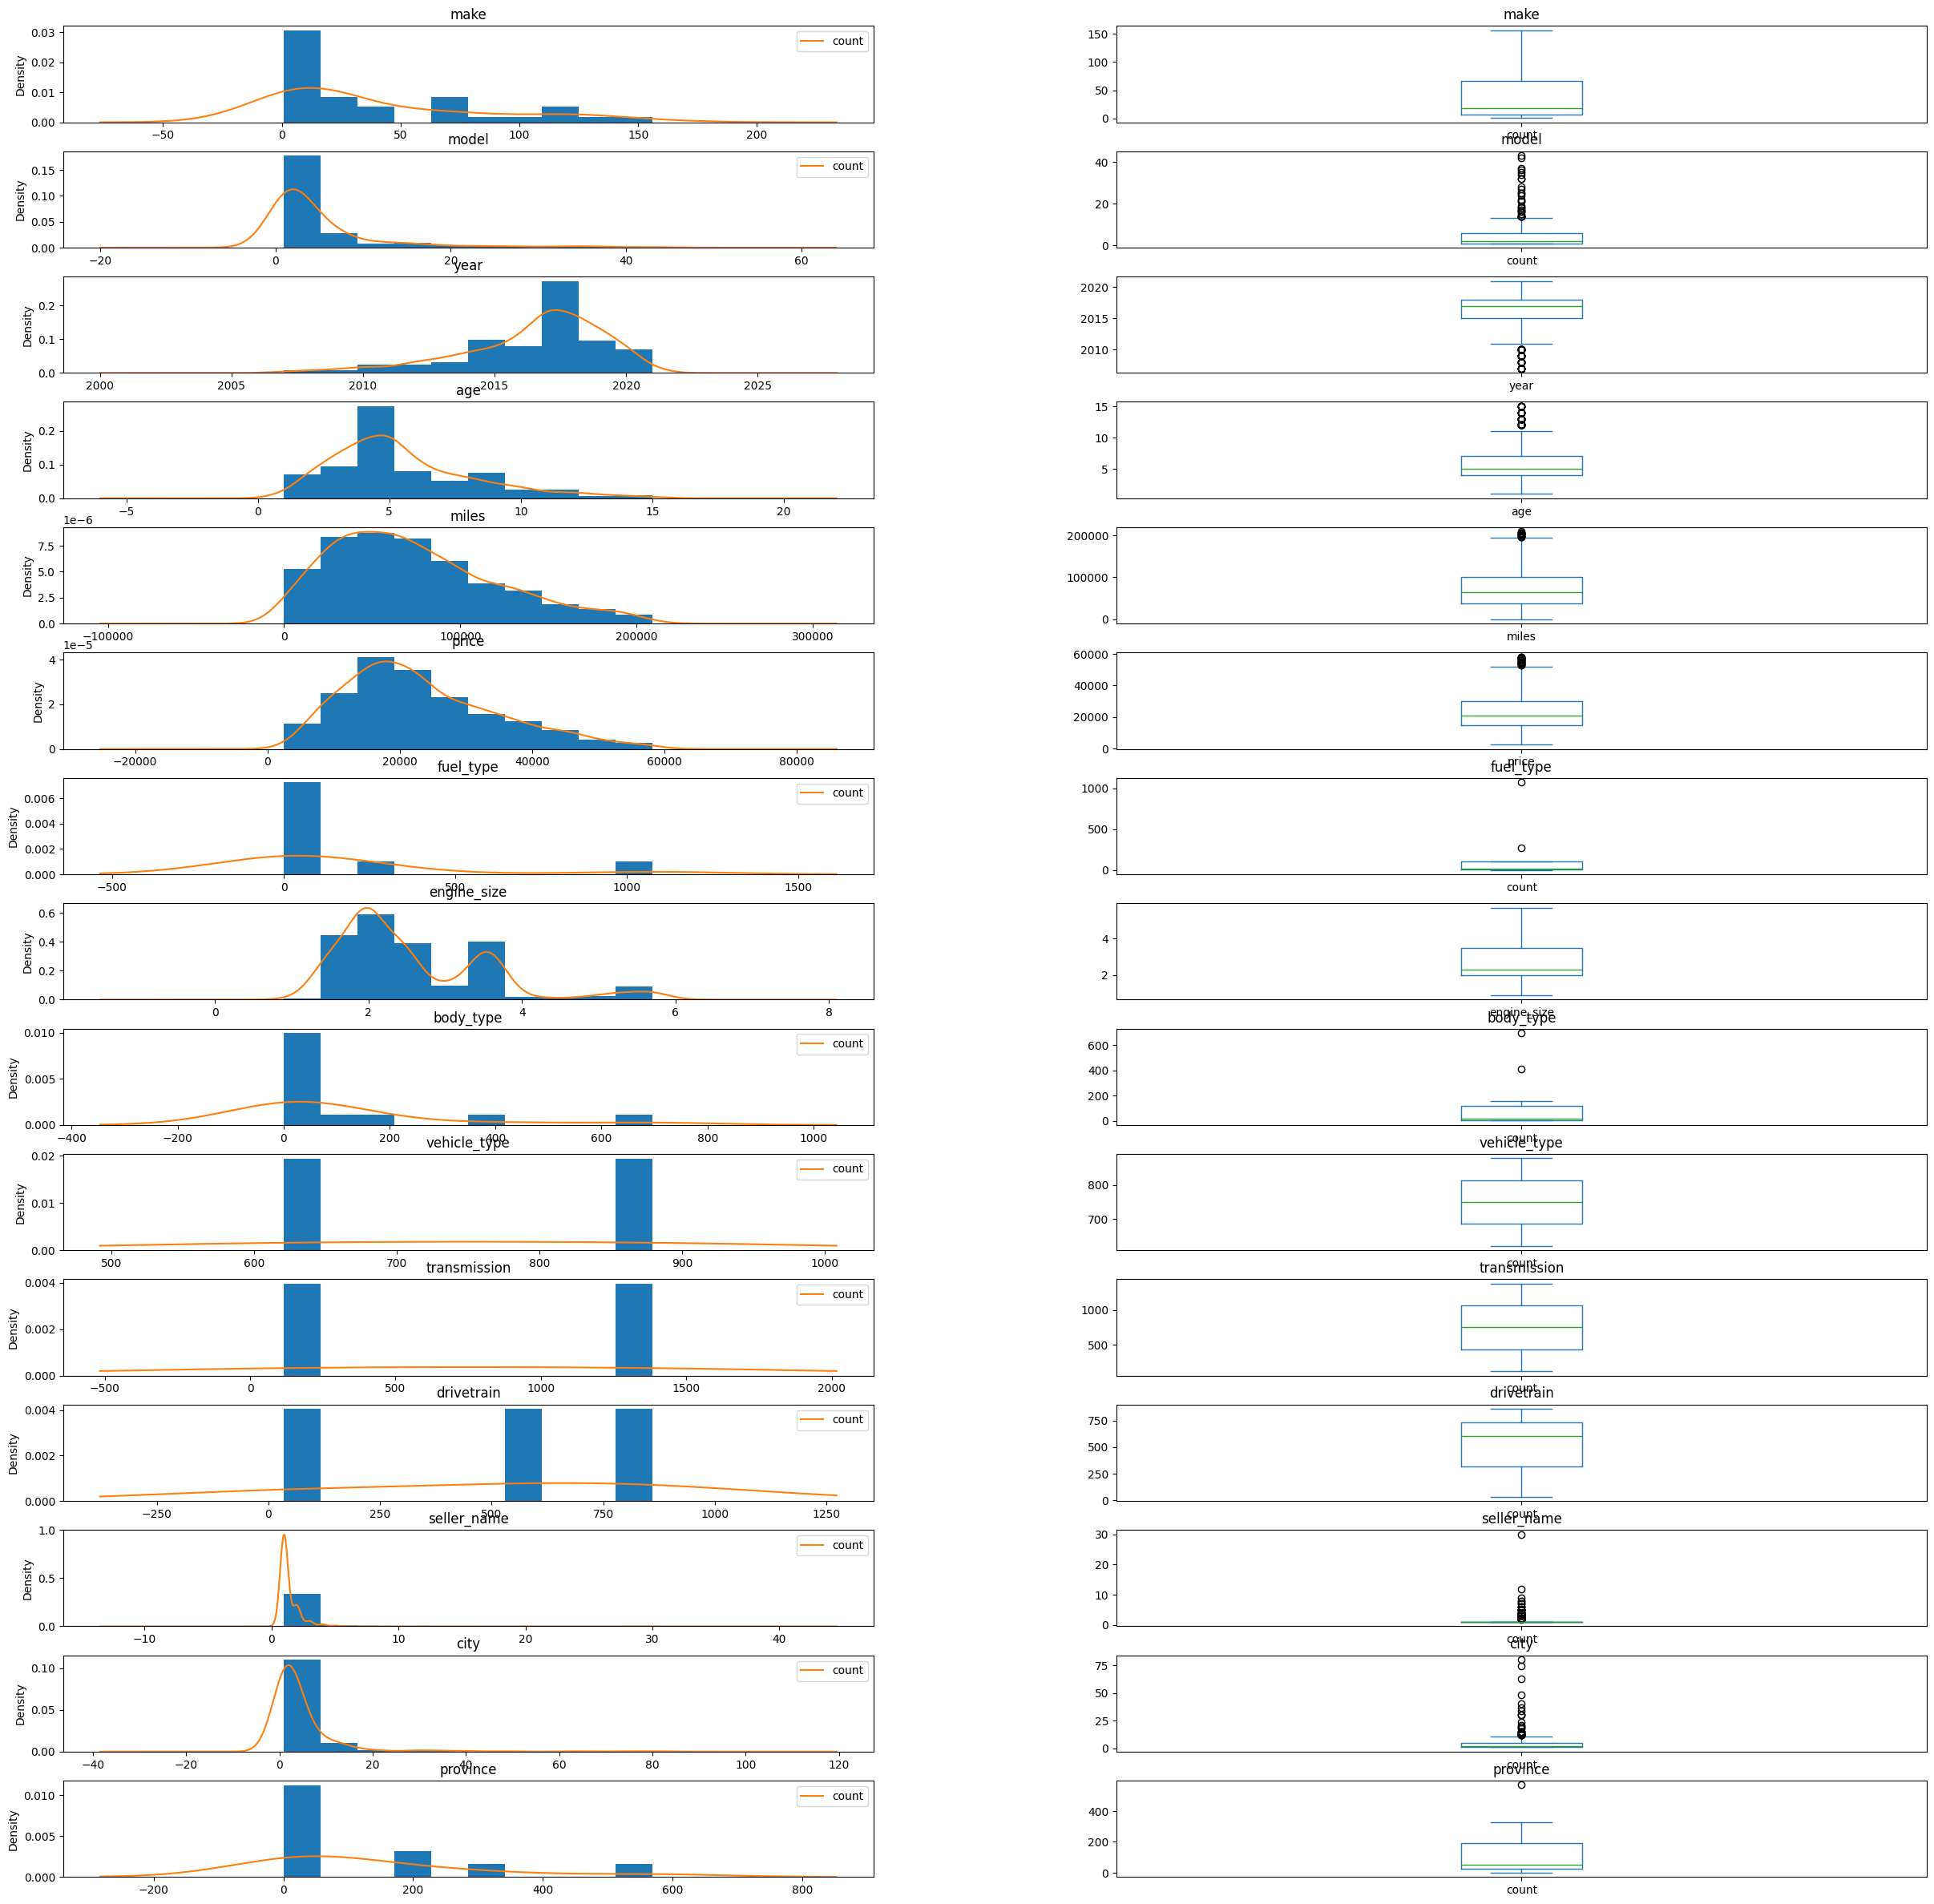

In [21]:
# plot all attributes
plot_histograms_boxplot_density(df_sub, -1)

#### **Discussing the Distribution of each Attribute**

**make**:
* Normally distributed, with some right-skewing. It has no missing data and it does not contain any outliers. Interestingly, because certain groups of **makes** seem to have the same frequency, the distribution almost seems tri-modal.

**model**:
* More normally distributed, being centered around a predominant **model** value, but is very heavily right-skewed, and it contains several outliers. 

**year**:
* Normally distributed, being centered around the '2017'-'2018' values. It is left-skewed, and has some outliers of older vehicles.

**age** | **miles** | **price**:
* These attributes have extremely similar distribution shapes, with normality decreasing across them (**age** being the most normally distributed, and **price** seeming more like a tri-modal distribution).

* It is interesting to note that though **age** is derived from year, it doesn't quite follow the same distribution, and is not left-skewed. This is because older cars have been pruned off. This makes this attribute follow a more balanaced normal distribution.

**fuel_type**:
* Weakly normally distributed, but not as tightly as some other attributes. It is also very heavily right-skewed.

**engine_size**:
* Tri-modally distributed, with concentrations around 2-, 3.5-, and 5.5-values.

**body_type**:
* Weakly norrmally distributed (wide Gaussian), and right-skewed, having some concentrated values at the extremes.

**vehicle_type** | **transmission** | **drivetrain**:
* All three of these are moreso uniformly distributed.
* Of the 3 attributes, **drivetrain** is the only one with 3 categories - the others have 2 categories. 

**seller_name** | **city**:
* These two attributes follow very similar distribution shapes. Very normally distributed (tight Gaussians, small std. dev.), and are both right-skewed.

**province**:
* Weakly normally distributed (wide Gaussian, large std. dev.).


## Iteration 2

#### **Task 1 - Feature Engineering (Encoding)**

Our dataset has 11 categorical attributes, although only 10 of them will be utilized in forecasting our missing values and outliers. 

The **vin** attribute will not be used because it has a categorical cardinality equivalent to the number of instances in our dataset. As mentioned in Iteration 1, we retain this attribute in order to assist with plotting ***non-numerical*** attributes. 

The **10** categorical attributes and the encodings we will be using on them are:


| Attribute | Encoder | Justification|
| --- | --- | --- |
| **make** | **label** | **high-cardinality (57) with no inherent ordering among categories** |
| **model** | **label** | **extremely high-cardinality (955) with no inherent ordering among categories** |
| **fuel_type** | **label** | **high-cardinality (26) with no inherent ordering among categories** |
| **body_type** | **label** | **high-cardinality (21) with no inherent ordering among categories** |
| **vehicle_type** | **frequency** | **low-cardinality (2) with no collision between categories** |
| **transmission** | **frequency** | **low-cardinality (2) with no collision between categories** |
| **drivetrain** | **frequency** | **low-cardinality (of 2) with no collision between categories**
| **seller_name** | **label** | **high-cardinality (5160) with no inherent ordering among categories** |
| **city** | **label** | **extremely high-cardinality (777) with no inherent ordering among categories; possibility of collision** |
| **province** | **frequency** | **high-cardinality (16) but no collision between categories** |

In [22]:
df_sub.info()

def attr_describe(data, cols):
    for c in cols:
        print(f'number of categories in {c}:')
        display(len(data.groupby(c).describe()))

attr_describe(df_sub, df_sub.columns)

<class 'pandas.core.frame.DataFrame'>
Index: 1500 entries, 7808a9b4-ac08 to a9738b04-32bc
Data columns (total 16 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   vin           1500 non-null   object 
 1   make          1500 non-null   object 
 2   model         1500 non-null   object 
 3   year          1500 non-null   float64
 4   age           1500 non-null   float64
 5   miles         1500 non-null   float64
 6   price         1500 non-null   float64
 7   fuel_type     1500 non-null   object 
 8   engine_size   1500 non-null   float64
 9   body_type     1500 non-null   object 
 10  vehicle_type  1500 non-null   object 
 11  transmission  1500 non-null   object 
 12  drivetrain    1500 non-null   object 
 13  seller_name   1500 non-null   object 
 14  city          1500 non-null   object 
 15  province      1500 non-null   object 
dtypes: float64(5), object(11)
memory usage: 199.2+ KB
number of categories in vin:


1500

number of categories in make:


38

number of categories in model:


287

number of categories in year:


15

number of categories in age:


15

number of categories in miles:


1432

number of categories in price:


954

number of categories in fuel_type:


9

number of categories in engine_size:


34

number of categories in body_type:


13

number of categories in vehicle_type:


2

number of categories in transmission:


2

number of categories in drivetrain:


3

number of categories in seller_name:


1060

number of categories in city:


309

number of categories in province:


11

In [23]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import OneHotEncoder

# to fix column names for attributes encoded with OHE (column name is made into a tuple, lol)
def formatColNames(data):

	for col_name in df.columns:
		if len(col_name[0])>1 :
			data.rename(columns={col_name:col_name[0]}, inplace=True)

def det_freq_categories(column_series):
	values_dict = column_series.unique()
	column_series = column_series.values.tolist()
	len_series = len(column_series)
	freq = {}

	for value in values_dict:
		freq[value] = column_series.count(value)/len_series

	return freq

def FreqEncoder(column_series):
	results = [0]*len(column_series)
	freq = det_freq_categories(column_series)

	for i in range(len(column_series)):
		results[i] = freq[column_series[i]]

	return np.array(results)

def apply_encoding(encoder, column_series):
	encoders_dict = {'LE' : LabelEncoder(), 
					 'OE' : OrdinalEncoder(),
					 'OHE' : OneHotEncoder(), 
					 'FE' : FreqEncoder(column_series)}

	if encoder=='LE':
		le_result = encoders_dict[encoder].fit_transform(column_series)
		return le_result, [encoder]
	elif encoder=='OE':
		oe_result = encoders_dict[encoder].fit_transform
		return oe_result, [encoder]
	elif encoder=='OHE':
		ohe = encoders_dict[encoder]																
		ohe_result = ohe.fit_transform(column_series.values.reshape(-1,1)).toarray()
		return ohe_result, ohe.categories_
	elif encoder=='FE':
		freq_result = encoders_dict[encoder]
		return freq_result, [encoder]

def apply_encodings(data, encoders, columns):
	if len(encoders) != len(columns):
		assert(len(encoders)==1), 'len(encoders) must be 1 if len(encoders)!=len(columns)'

	df_encoded=data.copy()

	if (len(encoders) == 1):					# one encoding technique (encoder) to 1 or more columns, where numColumns >= numEncoders = 1
		encoder=encoders[0]
		for column in columns:
			encoder_result, encoder_categories = apply_encoding(encoder, df_encoded[column])
			df_encoded = df_encoded.join(pd.DataFrame(encoder_result, index=df_encoded.index, columns=[column+'_'+category for category in encoder_categories]))
			df_encoded.drop(columns=[column], inplace=True)
	else:										# one encoding technique (encoder) to exactly 1 column, where numEncoders == numColumns >= 2
		for i in range(len(encoders)):
			encoder_result, encoder_categories = apply_encoding(encoders[i], df_encoded[columns[i]])
			df_encoded = df_encoded.join(pd.DataFrame(encoder_result, index=df_encoded.index, columns=[columns[i]+'_'+category for category in encoder_categories])) 		# could lead to issues if encoder_categories is a string, and not an array; if len(encoder_categories)==1, and len(encoder_categories[0])>1; category will thus iterate through encoder_categories[0] and select each letter, making the number of columns=len(encoder_categories[0]) instead of just len(encoder_categories)==1
			df_encoded.drop(columns=[columns[i]], inplace=True)
	
	return df_encoded

In [24]:
encoders = ['LE', 'LE', 'LE', 'LE', 'FE', 'FE', 'FE', 'LE', 'LE', 'FE']
cols_to_encode = ['make', 'model', 'fuel_type', 'body_type', 'vehicle_type', 'transmission', 'drivetrain', 'seller_name', 'city', 'province']
df_encoded = apply_encodings(df_sub, encoders, cols_to_encode)
formatColNames(df_encoded)
display(df_encoded)

,vin,year,age,miles,price,engine_size,make_LE,model_LE,fuel_type_LE,body_type_LE,vehicle_type_FE,transmission_FE,drivetrain_FE,seller_name_LE,city_LE,province_FE
id,,,,,,,,,,,,,,,,
7808a9b4-ac08,1FTEW1E50JKC37270,2018.0,4.0,56678.0,49812.0,5.0,10,98,8,9,0.586,0.922,0.573333,493,95,0.139333
583af840-8447,1FTFW1E54JFA01847,2018.0,4.0,81231.0,43204.0,5.0,10,98,8,9,0.586,0.922,0.573333,1002,305,0.038000
23303e32-8568,1FTFX1E52JKD62188,2018.0,4.0,63672.0,38396.0,5.0,10,98,8,9,0.586,0.922,0.573333,931,142,0.139333
cb9982e7-aa6f,1G1RA6S52HU190820,2017.0,5.0,49556.0,20197.0,1.5,6,263,4,5,0.414,0.922,0.403333,215,285,0.379333
98659025-4960,1G1RA6S59GU103199,2016.0,6.0,103000.0,18950.0,1.5,6,263,4,5,0.414,0.922,0.403333,125,273,0.379333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
e03ee694-c3a0,JTDKARFP1J3098633,2018.0,4.0,14546.0,24995.0,1.8,34,189,5,5,0.414,0.922,0.403333,430,216,0.219333
35561da0-a0b8,JTDKDTB30E1079449,2014.0,8.0,80967.0,12888.0,1.5,34,190,5,5,0.414,0.922,0.403333,58,261,0.118667
9c9c69b7-2443,JTDKDTB3XE1066921,2014.0,8.0,53054.0,16601.0,1.5,34,190,5,5,0.414,0.922,0.403333,629,142,0.139333


#### **Task 2 - Scaling the Data**

We explored the data scaling methods discussed in class, namely: 
* **MinMax Scaler**
* **MaxAbs Scaler**
* **Robust Scaler**
* **Quantile Transformer**
* **Z-Score Normalizer**
* **LogFunction Transformer**

In [25]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import MaxAbsScaler
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import QuantileTransformer
from sklearn.preprocessing import Normalizer
from sklearn.preprocessing import FunctionTransformer

def plot_histograms_density_for_scalers(arr_all_data, d_index, d_columns, scaler_labels, fig_title):
    fig, axs = plt.subplots(len(d_columns), len(scaler_labels),figsize=(30,45),constrained_layout=True)
    fig.suptitle(fig_title, fontsize=16)

    for i in range(len(scaler_labels)):
        df_scaled = pd.DataFrame(arr_all_data[i], index=d_index, columns=d_columns)         # reconstructing dataframe from scaled data (np-array)
        
        for j in range(len(d_columns)):
            col = d_columns[j]
            df_scaled[col].hist(ax=axs[j,i], density=True)
            df_scaled[col].plot.density(ax=axs[j,i])
            axs[j,i].set_title(label=col+'_'+scaler_labels[i])

def scale_entire_dataset(df, scalers):
    data = [0]*len(scalers)

    for i in range(len(scalers)):
        if scalers[i]=='Raw Data':
            data[i] = df.to_numpy()                                                         # fit_transform converts to numpy array, but we explicitly convert for raw data since we don't fit_transform that 
            continue

        df_t = scalers[i].fit_transform(df.to_numpy())
        data[i] = df_t
    
    return data

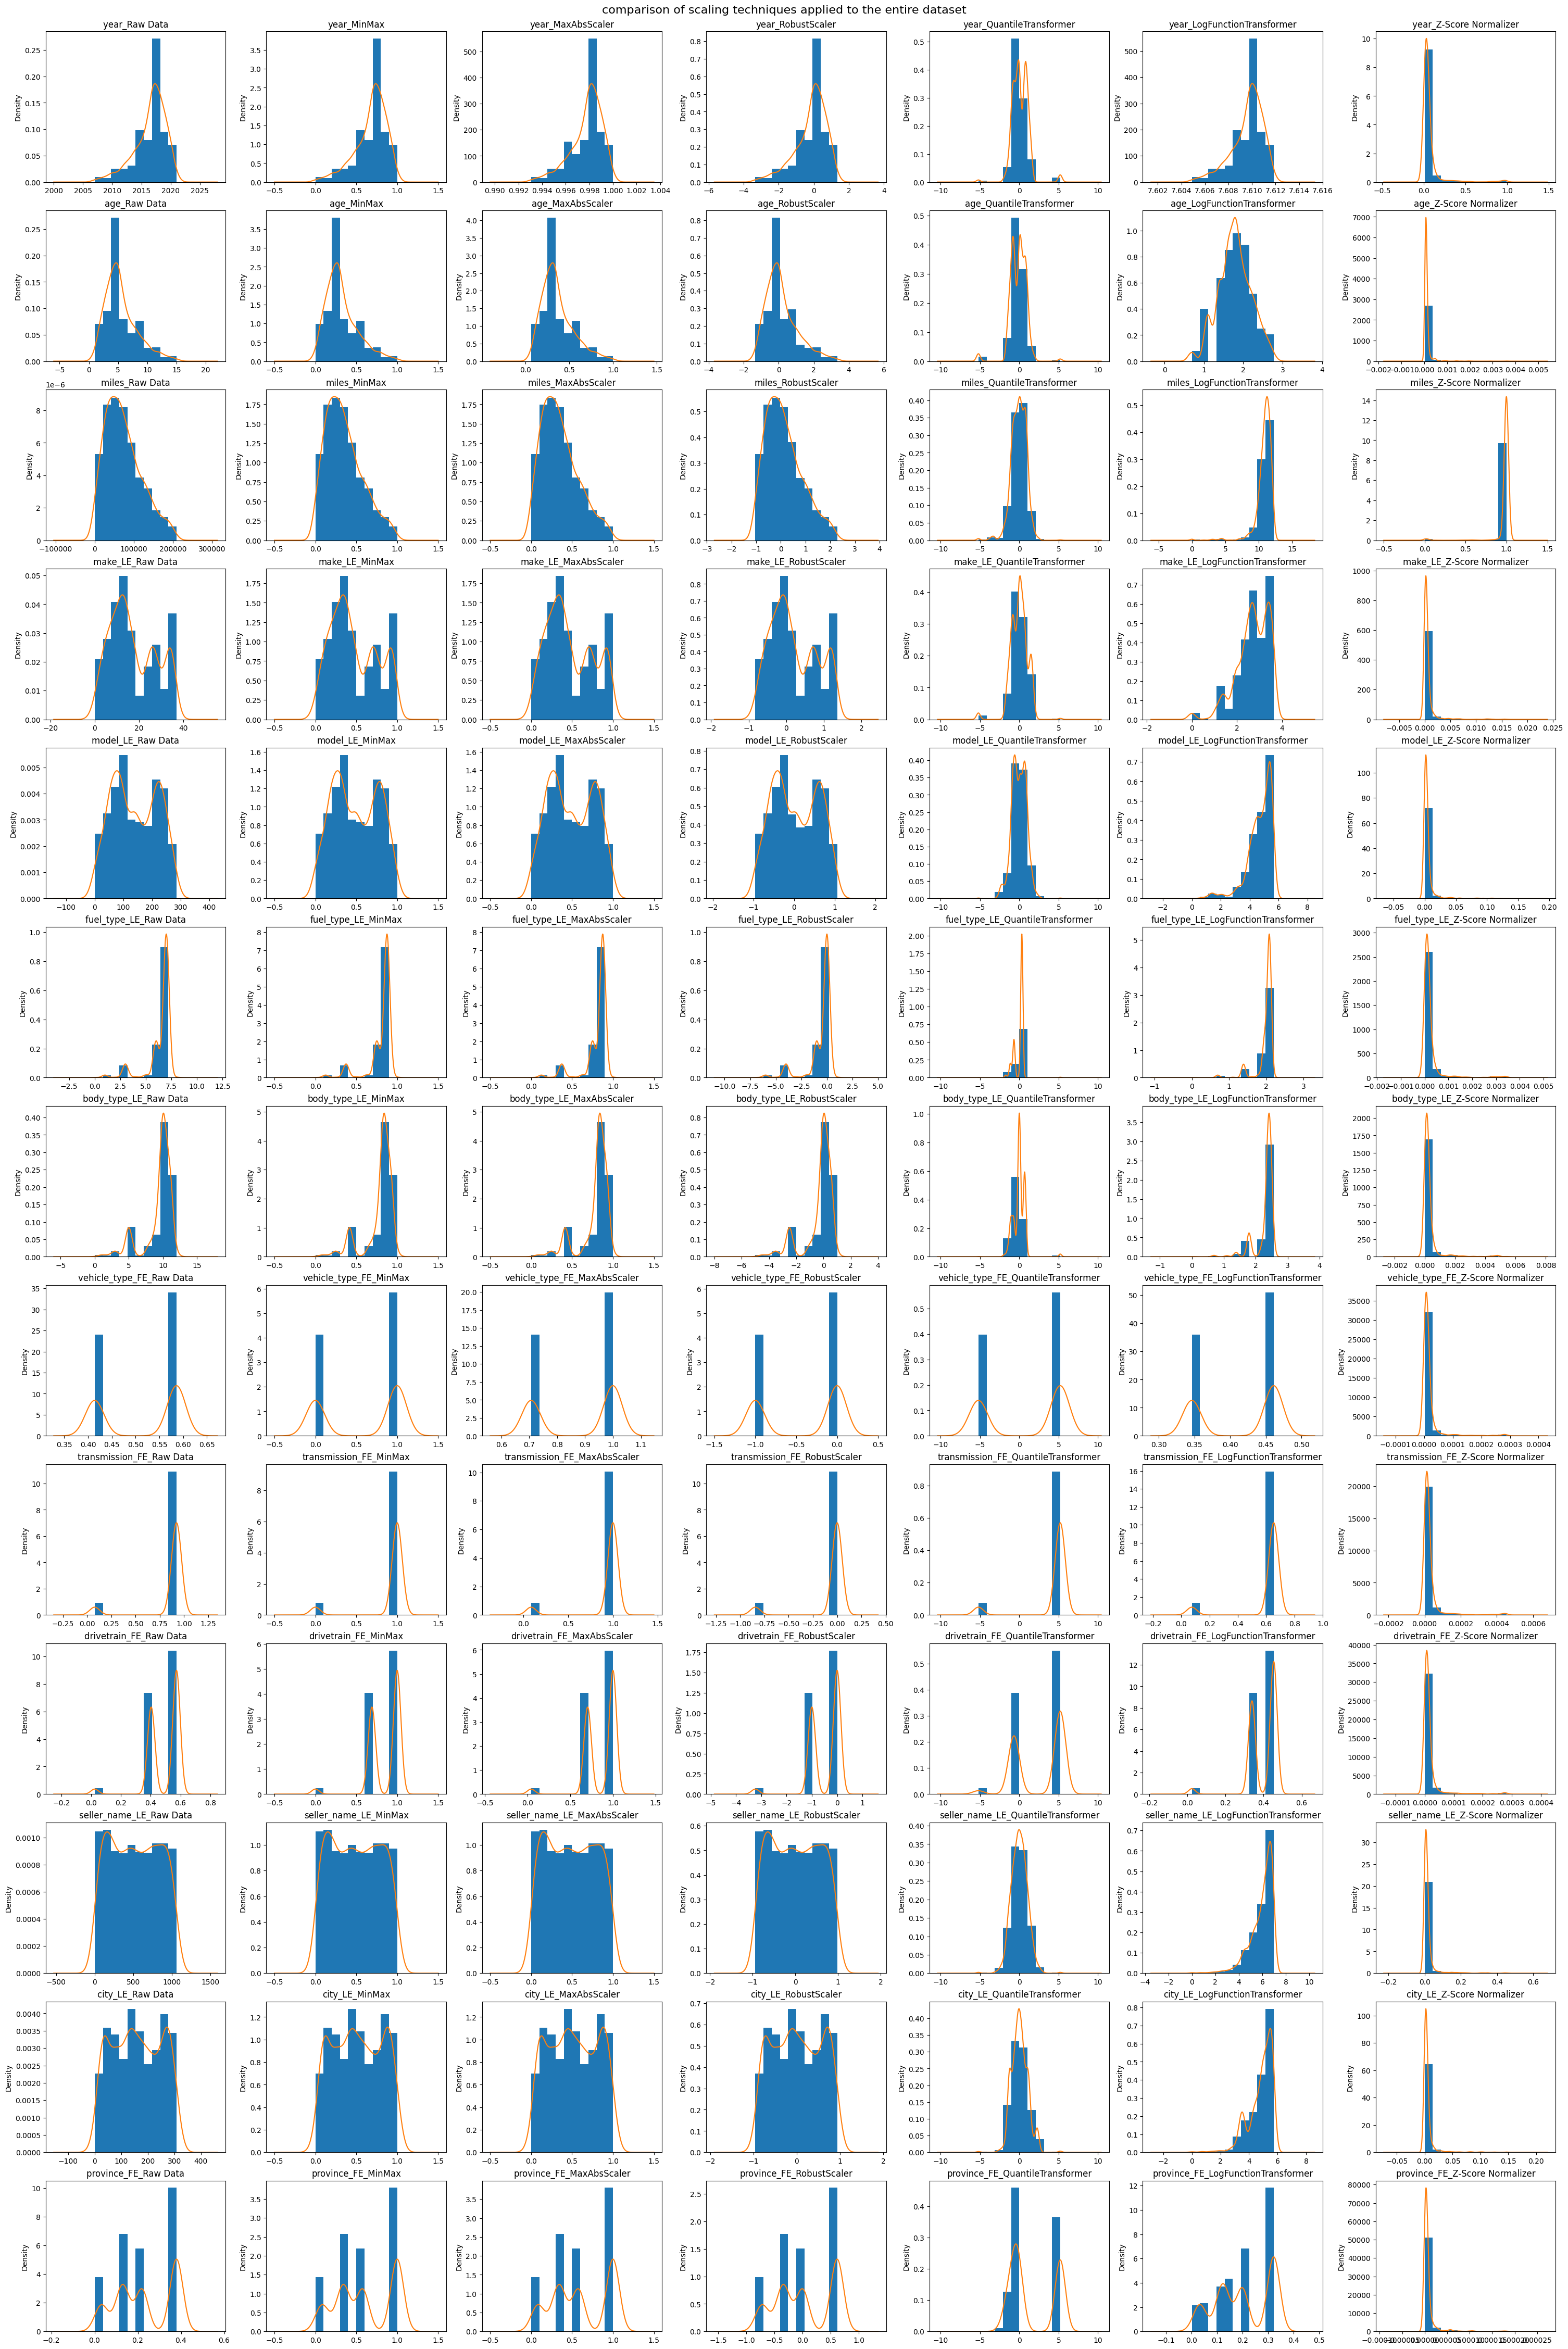

In [26]:
df_to_scale = df_encoded.drop(columns=['vin', 'price', 'engine_size'])

scalers = ['Raw Data', MinMaxScaler(), MaxAbsScaler(), RobustScaler(), QuantileTransformer(n_quantiles=5, random_state=0, output_distribution='normal'), FunctionTransformer(np.log1p), Normalizer()]
scalers_labels = ['Raw Data', 'MinMax', 'MaxAbsScaler', 'RobustScaler', 'QuantileTransformer', 'LogFunctionTransformer', 'Z-Score Normalizer']
raw_and_scaled_data = scale_entire_dataset(df_to_scale, scalers)

# display(len(raw_and_scaled_data))
plot_histograms_density_for_scalers(raw_and_scaled_data, df_to_scale.index, df_to_scale.columns, scalers_labels, 'comparison of scaling techniques applied to the entire dataset')

#### **Discussing the Scalers and selecting a few to work with**

We decided to drop the **MinMax Scaler** because it gives the identical results to the **MaxAbs Scaler**. 

Since a handful of our initial dataset is not normally distributed, we also dropped **Z-Score Normalizer** because it rescales the data to a unit norm, regardless of the distribution of the data. Ideally, we want to preserve the distribution of the data. 

Lastly, we dropped **LogFunction Transformer** transformer because it also casts the shape of the original distributions into a different distribution.

In [27]:
raw_and_scaled_data.pop(1)                  # drop 'MinMax' data
raw_and_scaled_data.pop(-1)                 # drop 'LogFunctionTransformer' data
raw_and_scaled_data.pop(-1)                 # drop 'Z-Score Normalizer' data

scalers_labels.pop(1)                       # drop 'MinMax' label
scalers_labels.pop(-1)                      # drop 'LogFunctionTransformer' label
scalers_labels.pop(-1)                      # drop 'Z-Score Normalizer' label

'LogFunctionTransformer'

#### **Task 3 - Model Training & Testing**

Now, we take our encoded and scaled dataset train some models on them. We selected 3 models for comparision:
* LinearRegression
* KNeighborsRegressor
* RandomForestRegressor

We know that the performance of RandomForest model (Classifier or Regressor) is invariant to scaling techniques, because of their operating mechanism. As such, we included it as a sort of background benchmark, to highlight decent or terrible performance from the LinearRegression or KNeighborsRegressor models.

In [28]:
from sklearn.model_selection import RepeatedKFold, cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor

def print_stats(training_results, scaler_labels, model_labels):
    df_results = pd.DataFrame()
    for scaler in scaler_labels:
        df_scaler_results = pd.DataFrame()        
        for model in model_labels:
            df_scaler_results[scaler+'-'+model] = training_results[scaler][model]
        df_scaler_results = pd.concat([df_scaler_results, df_scaler_results.agg(['mean', 'median'])])
        df_results = pd.concat([df_results, df_scaler_results], axis=1)

    display(pd.concat([df_results[df_results.index=='mean'], df_results[df_results.index=='median']], axis=0))

def plot_results_by_scaler(training_scores, scaler_labels, model_labels, fig_title):

    if(len(scaler_labels)>1):
        fig, axs = plt.subplots(len(scaler_labels), figsize=(15,15), sharey='row')
        fig.suptitle(fig_title)
        axs = axs.flatten()
    else:
        fig, axs = plt.subplots(len(scaler_labels), figsize=(5,5), sharey='row')
        fig.suptitle(fig_title)

    i=0
    for scaler in scaler_labels:
        df_scaler_results = pd.DataFrame()
        for model in model_labels:
            df_scaler_results[model] = training_scores[scaler][model]

        if(len(scaler_labels)>1):
            df_scaler_results.boxplot(ax=axs[i])
            axs[i].set(title='Comparison of the '+scaler+' technique, grouped by each learning model.')
        else:
            df_scaler_results.boxplot(ax=axs)
            axs.set(title='Comparison of the '+scaler+' technique, grouped by each learning model.')

        i+=1

def plot_results_by_model(training_scores, scaler_labels, model_labels, fig_title):
    
    if(len(model_labels)>1):
        fig, axs = plt.subplots(len(model_labels), figsize=(15,15), sharey='row')
        fig.suptitle(fig_title)
        axs = axs.flatten()
    else:
        fig, axs = plt.subplots(len(model_labels), figsize=(5,5), sharey='row')
        fig.suptitle(fig_title)

    i=0
    for model in model_labels:
        df_model_results = pd.DataFrame()
        for scaler in scaler_labels:
            df_model_results[scaler] = training_scores[scaler][model]
        
        if(len(model_labels)>1):
            df_model_results.boxplot(ax=axs[i])
            axs[i].set(title='Comparison of the '+model+' learning model, grouped by each scaling technique')
        else:
            df_model_results.boxplot(ax=axs)
            axs.set(title='Comparison of the '+model+' learning model, grouped by each scaling technique')

        i+=1

def run_models(scaled_data, scaler_labels, models, model_labels, output, splits, repeats, default_scorer):
    assert(len(models)==len(model_labels)), '0 > len(models)==len(model_labels)==True'

    scoring_dict = {'LinRegressor'              :   'r2',
                    'SGDRegressor'              :   'r2',
                    'SGDClassifier'             :   'f1_weighted',
                    'KNRegressor'               :   'r2',                                   
                    'KNClassifier'              :   'roc_auc',
                    'RFRegressor'               :   'r2',                           
                    'RFClassifier'              :   'accuracy',
                    'SVC'                       :   'f1_weighted',
                    'default'                   :   'r2'                               
                    }
                    
    training_scores = {}
    y = output.to_numpy()
    s = splits                   # n_splits
    r = repeats                  # n_repeats
    cv = RepeatedKFold(n_splits=s, n_repeats=r, random_state=1)

    for i in range(len(scaler_labels)):
        X_t = scaled_data[i]
        training_scores[scaler_labels[i]] = {}
        
        for j in range(len(models)):
            if default_scorer:
                scores = cross_val_score(models[j], X_t, y, scoring=scoring_dict['default'], cv=cv, n_jobs=-1)
            else:
                scores = cross_val_score(models[j], X_t, y, scoring=scoring_dict[model_labels[j]], cv=cv, n_jobs=-1)

            training_scores[scaler_labels[i]][model_labels[j]] = scores

    return training_scores

In [29]:
models = [LinearRegression(), KNeighborsRegressor(n_neighbors=5), RandomForestRegressor(max_depth=2, random_state=0)]
models_labels = ['LinRegressor', 'KNRegressor', 'RFRegressor']

target_price_y = df_sub['price']
scores_price = run_models(raw_and_scaled_data, scalers_labels, models, models_labels, target_price_y, 10, 3, default_scorer=True)

Analysing the plots below, we see that for forecasting **price**, the *LinearRegressor* model performs *approximately* the same, irrespective of scaling techniques. 

As for the *KNRegressor* model, its performance **peaks** when using data scaled using the RobustScaler technique. 

Finally, as expected, the *RandomForestRegressor* performs exactly the same across all forms of scaled data.

,Raw Data-LinRegressor,Raw Data-KNRegressor,Raw Data-RFRegressor,MaxAbsScaler-LinRegressor,MaxAbsScaler-KNRegressor,MaxAbsScaler-RFRegressor,RobustScaler-LinRegressor,RobustScaler-KNRegressor,RobustScaler-RFRegressor,QuantileTransformer-LinRegressor,QuantileTransformer-KNRegressor,QuantileTransformer-RFRegressor
mean,0.518623,0.123205,0.505588,0.518620,0.516292,0.505588,0.516757,0.634655,0.505588,0.554162,0.564343,0.505588
median,0.512076,0.118075,0.511162,0.512075,0.513850,0.511162,0.508036,0.635681,0.511162,0.552309,0.565683,0.511162


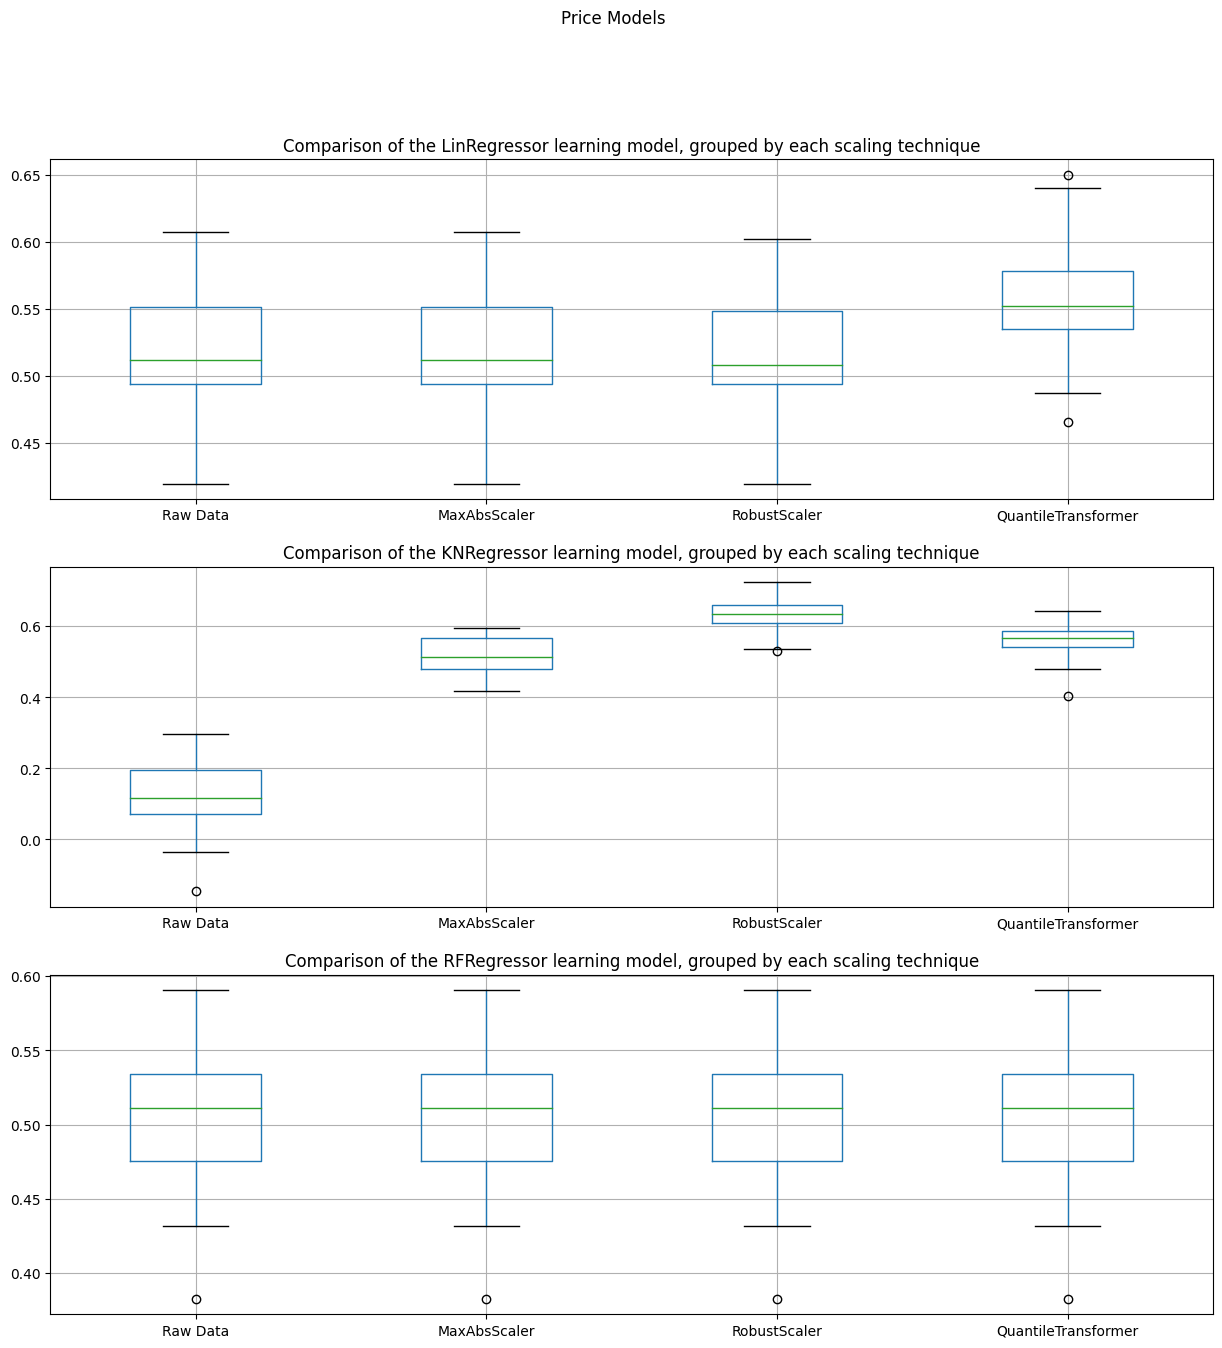

In [30]:
print_stats(scores_price, scalers_labels, models_labels)
plot_results_by_model(scores_price, scalers_labels, models_labels, 'Price Models')

In [31]:
target_eng_size_y = df_sub['engine_size']
scores_engine_size = run_models(raw_and_scaled_data, scalers_labels, models, models_labels, target_eng_size_y, 10, 3, default_scorer=True)

Similarly, analysing the performances of the models for forecasting **engine_size**, we observe that the *LinearRegressor* model only offers minimal improvements across different scaling techniques.

However, the *KNeighborsRegressor* once again **peaks** on the RobustScaler data.

Finally, as expected again, the *RandomForestRegressor performs the same, invariant to scaling techniques.

,Raw Data-LinRegressor,Raw Data-KNRegressor,Raw Data-RFRegressor,MaxAbsScaler-LinRegressor,MaxAbsScaler-KNRegressor,MaxAbsScaler-RFRegressor,RobustScaler-LinRegressor,RobustScaler-KNRegressor,RobustScaler-RFRegressor,QuantileTransformer-LinRegressor,QuantileTransformer-KNRegressor,QuantileTransformer-RFRegressor
mean,0.199050,-0.177078,0.436043,0.199049,0.180275,0.436043,0.193398,0.348838,0.436043,0.192130,0.278883,0.436043
median,0.208887,-0.158956,0.435183,0.208865,0.181044,0.435183,0.208198,0.352107,0.435183,0.200866,0.289220,0.435183


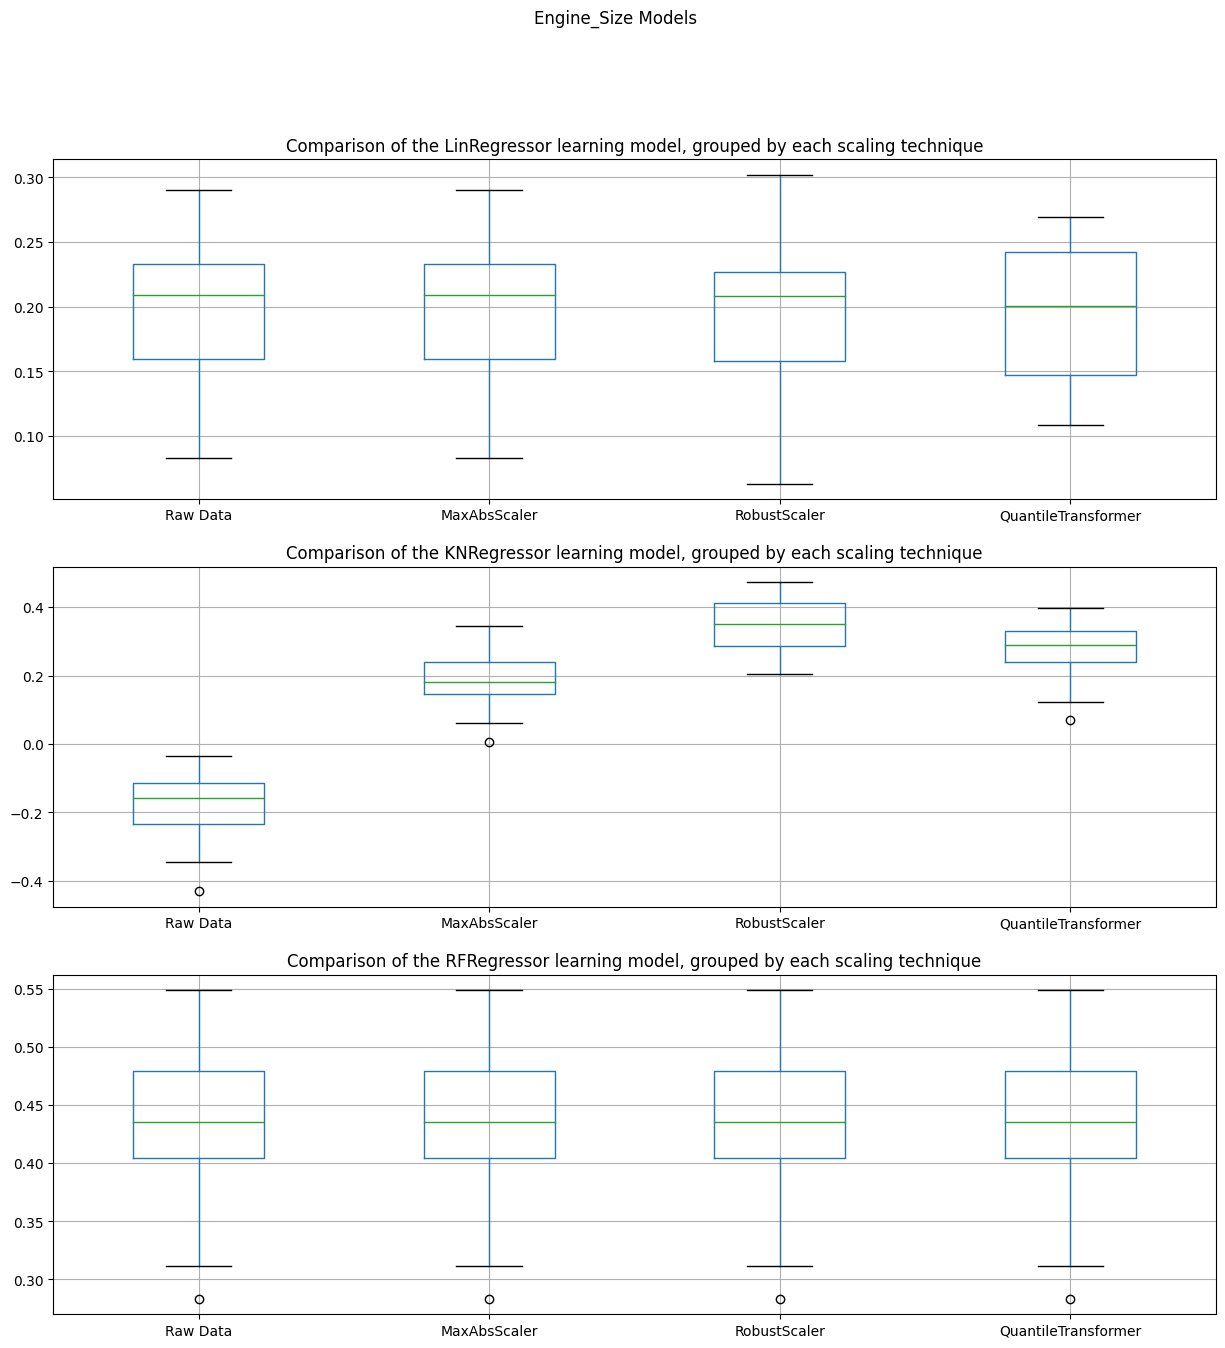

In [32]:
print_stats(scores_engine_size, scalers_labels, models_labels)
plot_results_by_model(scores_engine_size, scalers_labels, models_labels, 'Engine_Size Models')

#### **Task 4 - Prediction of missing values and outliers**

Now, we use our best **scaler/model** combination to predict the missing and outlier values for the **price** and **engine_size** attributes.

In [33]:
# using the combination of scaling technique and model that yielded the best results
best_scaled_X = raw_and_scaled_data[1]
model = KNeighborsRegressor(n_neighbors=5)

#### **Predicting missing price values**

In [34]:
target_price_y = df_sub['price'].to_numpy()
model.fit(best_scaled_X, target_price_y)

# forecast the rows with missing price
missing_price_encoded = apply_encodings(missing_price.drop(columns=['vin', 'price', 'engine_size']), encoders, cols_to_encode)
formatColNames(missing_price_encoded)
missing_price_X = scale_entire_dataset(missing_price_encoded, [RobustScaler()])[0]

# predict
missing_price_y = model.predict(missing_price_X)
missing_price_results = pd.DataFrame({'make':missing_price['make'], 'model':missing_price['model'], 'est_price': missing_price['price'], 'pred_price': missing_price_y}, index=missing_price_encoded.index)
missing_price_results['error'] = abs(missing_price_results['est_price'] - missing_price_results['pred_price'])/missing_price_results['est_price']
display(missing_price_results)

,make,model,est_price,pred_price,error
id,,,,,
79d4a6a9-c265,Acura,NSX,188460.000000,28269.0,0.850000
bcd6cd07-d086,Dodge,Avenger,7222.508772,13055.4,0.807599
1da10187-32e9,RAM,Ram 1500 Pickup,39412.826868,14462.2,0.633059
8cf8f9a0-2107,RAM,Ram 1500 Pickup,39412.826868,14462.2,0.633059
28f7b8ce-430a,Ford,F-150,38548.950495,25470.4,0.339271
...,...,...,...,...,...
4d2b5477-81b6,Kia,Niro,27141.258503,38517.6,0.419153
c2936657-a522,Kia,Niro,27141.258503,36532.0,0.345995
6c3412e0-ed58,Kia,Niro,27141.258503,36953.4,0.361521


#### **Predicting outlier price values**

In [35]:
# forecast the rows with outlier price
outliers_price_encoded = apply_encodings(outliers_price.drop(columns=['vin', 'price', 'engine_size']), encoders, cols_to_encode)
formatColNames(outliers_price_encoded)
outliers_price_X = scale_entire_dataset(outliers_price_encoded, [RobustScaler()])[0]

# # predict
outliers_price_y = model.predict(outliers_price_X)
outliers_price_results = pd.DataFrame({'make':outliers_price['make'], 'model':outliers_price['model'], 'est_price': outliers_price['price'], 'pred_price': outliers_price_y}, index=outliers_price_encoded.index)
outliers_price_results['error'] = abs(outliers_price_results['est_price'] - outliers_price_results['pred_price'])/outliers_price_results['est_price']
display(outliers_price_results)      

,make,model,est_price,pred_price,error
id,,,,,
0fd1e468-48c8,Ford,F-150,58432.0,13673.0,0.766002
e6adcd46-fb74,Ford,F-150,58432.0,10692.8,0.817004
317f5475-fb34,Ford,F-150,58432.0,21796.2,0.626982
333c7bfa-a0a3,Ford,F-150,58432.0,13069.0,0.776338
719a21c5-194a,Ford,F-150,58432.0,19853.0,0.660238
...,...,...,...,...,...
420ed343-ca7e,Land Rover,Range Rover Evoque,57900.0,34857.6,0.397969
50a2d043-54be,Land Rover,Range Rover Evoque,57900.0,16598.8,0.713320
4d4525cf-b98d,Land Rover,Range Rover Evoque,57900.0,30954.0,0.465389


#### **Predicting missing engine_size values**

In [36]:
target_engine_size_y = df_sub['engine_size'].to_numpy()
model.fit(best_scaled_X, target_engine_size_y)

# forecast the rows with missing engine_size
# encode and scale
missing_engine_size_encoded = apply_encodings(missing_engine_size.drop(columns=['vin', 'price', 'engine_size']), encoders, cols_to_encode)
formatColNames(missing_engine_size_encoded)
missing_engine_size_X = scale_entire_dataset(missing_engine_size_encoded, [RobustScaler()])[0]

# predict
missing_engine_size_y = model.predict(missing_engine_size_X)
missing_engine_size_results = pd.DataFrame({'body_type' : missing_engine_size['body_type'], 'est_engine_size' : missing_engine_size['engine_size'], 'pred_engine_size' : missing_engine_size_y}, index=missing_engine_size_encoded.index)
missing_engine_size_results['error'] = abs(missing_engine_size_results['est_engine_size'] - missing_engine_size_results['pred_engine_size'])/missing_engine_size_results['est_engine_size']
display(missing_engine_size_results)      

,body_type,est_engine_size,pred_engine_size,error
id,,,,
d295eb75-3688,Sedan,2.0,2.38,0.190000
a0dd2860-aac1,Sedan,2.0,1.90,0.050000
78af3839-df97,Sedan,2.0,2.10,0.050000
835fe8e0-1394,Sedan,2.0,1.86,0.070000
4b77942b-0ce6,Sedan,2.0,1.78,0.110000
...,...,...,...,...
2e0e0037-5533,Convertible,3.0,2.18,0.273333
caec39a0-c733,Coupe,2.0,3.26,0.630000
f8c8f411-8baf,Roadster,2.7,3.22,0.192593


#### **Predicting outlier engine_size values**

In [37]:
# forecast the rows with outlier engine_size
outliers_engine_size_encoded = apply_encodings(outliers_engine_size.drop(columns=['vin', 'price', 'engine_size']), encoders, cols_to_encode)
formatColNames(outliers_engine_size_encoded)
outliers_engine_size_X = scale_entire_dataset(outliers_engine_size_encoded, [RobustScaler()])[0]

# predict
outliers_engine_size_y = model.predict(outliers_engine_size_X)
outliers_engine_size_results = pd.DataFrame({'body_type' : outliers_engine_size['body_type'], 'est_engine_size' : outliers_engine_size['engine_size'], 'pred_engine_size' : outliers_engine_size_y}, index=outliers_engine_size_encoded.index)
outliers_engine_size_results['error'] = abs(outliers_engine_size_results['est_engine_size'] - outliers_engine_size_results['pred_engine_size'])/outliers_engine_size_results['est_engine_size']
display(outliers_engine_size_results)      

,body_type,est_engine_size,pred_engine_size,error
id,,,,
122b168b-003b,Passenger Van,5.6,3.80,0.321429
d7007f7a-10e9,Passenger Van,5.6,2.18,0.610714
0a5ecad3-aa7d,Pickup,5.7,2.04,0.642105
1a66c20f-73f4,Pickup,5.7,3.24,0.431579
62ac577a-94ef,Pickup,5.7,3.94,0.308772
...,...,...,...,...
d311b131-7c4b,Pickup,5.7,3.06,0.463158
971440de-e1c7,Pickup,5.7,3.44,0.396491
3d53551c-e172,Pickup,5.7,4.08,0.284211


### **Part 4 - Supervised Learning problem design and experimentation**

#### **Task 5 - Experimentation: feature selection and hyperparameter-tuning**

From the get-go, we included attributes that might not be relevant to or correlated with the output attributes we are forecasting.

For instance, it is extremely *unlikely* that the particular **seller_name** (or dealership) would contribute much to the speculated **price**. In the same vein, it is also extremely *unlikely* that **city** or the **province** will contribute to the speculated **engine_size**.

As such, we decided to perform some rudimentary feature selection strategies using *f_regression* and *mutual_info_regression* to determine which attributes contribute most to the attributes we are trying to forecast.

We also perform hyperparameter-tuning run on our best model, KNeighborsRegressor, by running a Grid-Search to determine the best combination of parameters.

#### **Filtering - Univariate Feature Selection for price**

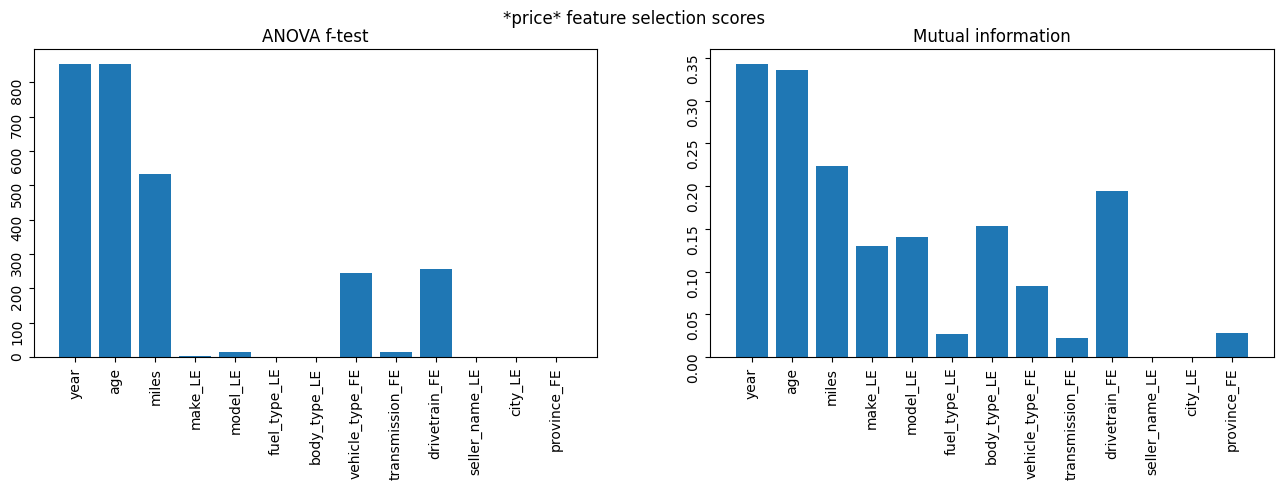

In [38]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression, mutual_info_regression

def plot_selection_scores(fs, mi, cols, fig_title):
    fig, axs = plt.subplots(1, 2, figsize=(16,4))
    fig.suptitle(fig_title)
    axs = axs.flatten()
    axs[0].bar(cols, fs.scores_)
    axs[0].tick_params(labelrotation=90)
    axs[0].set_title('ANOVA f-test')
    axs[1].bar(cols, mi.scores_)
    axs[1].tick_params(labelrotation=90)
    axs[1].set_title('Mutual information')

# feature selection
def select_features(X, y, score_function):
    # configure to select all features
    sel = SelectKBest(score_func=score_function, k='all')
    # learn relationship from training data
    sel.fit(X, y)
    return sel
 
X = best_scaled_X

# feature selection for price (using filtering method)
price_y = df_encoded['price']
fs = select_features(X, price_y, f_regression)
mi = select_features(X, price_y, mutual_info_regression)
plot_selection_scores(fs, mi, (df_encoded.drop(columns=['vin', 'price', 'engine_size'])).columns, '*price* feature selection scores')

Based on the results of the feature selection, it is clear that the following attributes contribute substantially more to the **price** than all other attributes:

* **year**
* **miles**
* **make**
* **model**
* **body_type_LE**
* **vehicle_type_FE**
* **drive_train_FE**

As such, we will train our model solely on these attributes and report whether there is an improvement in the predictive performance.

In [39]:
df_fs_price = df_encoded.loc[:, ['year', 'miles', 'make_LE', 'model_LE', 'body_type_LE', 'vehicle_type_FE', 'drivetrain_FE']]
df_fs_scaled_price = scale_entire_dataset(df_fs_price, [RobustScaler()])[0]

target_price_y = df_encoded['price']

##### **GridSearch - Hyperparameter-tuning on KNRegressor for price**

In [40]:
from sklearn.model_selection import GridSearchCV

def grid_search(X_train, y_train, model, params):
    gs = GridSearchCV(model, params, cv=5, n_jobs=1, verbose=1, scoring='r2')
    gs.fit(X_train, y_train)
    print('Best Params:', gs.best_params_)
    return gs.best_params_

grid_params = {
    'n_neighbors'   :   list(range(1,30)),
    'weights'       :   ['uniform', 'distance'],
    'metric'        :   ['euclidean', 'manhattan', 'minkowski']
}

hp_tuning_res = grid_search(df_fs_scaled_price, target_price_y, KNeighborsRegressor(), grid_params)

Fitting 5 folds for each of 174 candidates, totalling 870 fits
Best Params: {'metric': 'manhattan', 'n_neighbors': 8, 'weights': 'distance'}


Based on our feature selection results for the **price** attribute and model hyperparameter-tuning, we train our *KNeighborsRegressor* model on our *RobustScaler* data again. 

In [41]:
scores_price_fs = run_models([df_fs_scaled_price], ['RobustScalerFS'], [KNeighborsRegressor(metric=hp_tuning_res['metric'], n_neighbors=hp_tuning_res['n_neighbors'], weights=hp_tuning_res['weights'])], ['KNRegressorFS'], target_price_y, 10, 3, default_scorer=True)

From the following plots, we observe a decent improvement in the mean and median r2 scores.

**price** model scores prior to feature selection


,RobustScaler-KNRegressor
mean,0.634655
median,0.635681


**price** model scores after feature selection


,RobustScalerFS-KNRegressorFS
mean,0.741421
median,0.740099


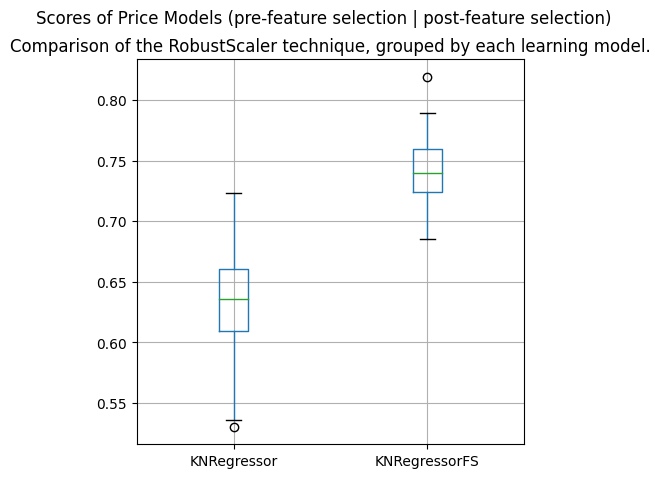

In [42]:
print('**price** model scores prior to feature selection')
print_stats(scores_price, ['RobustScaler'], ['KNRegressor'])
print('**price** model scores after feature selection')
print_stats(scores_price_fs, ['RobustScalerFS'], ['KNRegressorFS'])
compare = {}
compare['RobustScaler'] = (scores_price['RobustScaler']|scores_price_fs['RobustScalerFS'])
plot_results_by_scaler(compare, ['RobustScaler'], ['KNRegressor', 'KNRegressorFS'], 'Scores of Price Models (pre-feature selection | post-feature selection)')

Now, we proceed to re-predict the missing **price** values using the select subset of features and our updated *KNeighbors* model.

In [43]:
target_price_y = df_encoded['price'].to_numpy()
model = KNeighborsRegressor(metric=hp_tuning_res['metric'], n_neighbors=hp_tuning_res['n_neighbors'], weights=hp_tuning_res['weights'])
model.fit(df_fs_scaled_price, target_price_y)

# forecast the rows with missing price using only a select subset of features
missing_price_fs_encoded = missing_price_encoded.loc[:, ['year', 'miles', 'make_LE', 'model_LE', 'body_type_LE', 'vehicle_type_FE', 'drivetrain_FE']]
missing_price_fs_X = scale_entire_dataset(missing_price_fs_encoded, [RobustScaler()])[0]

# predict
missing_price_fs_y = model.predict(missing_price_fs_X)
missing_price_fs_results = pd.DataFrame({'make':missing_price['make'], 'model':missing_price['model'], 'est_price': missing_price['price'], 'pred_price': missing_price_fs_y}, index=missing_price_fs_encoded.index)
missing_price_fs_results['error'] = abs(missing_price_fs_results['est_price']-missing_price_fs_results['pred_price'])/missing_price_fs_results['est_price']
display(missing_price_fs_results)

,make,model,est_price,pred_price,error
id,,,,,
79d4a6a9-c265,Acura,NSX,188460.000000,33328.627265,0.823153
bcd6cd07-d086,Dodge,Avenger,7222.508772,6586.684279,0.088034
1da10187-32e9,RAM,Ram 1500 Pickup,39412.826868,26649.883607,0.323827
8cf8f9a0-2107,RAM,Ram 1500 Pickup,39412.826868,22663.640677,0.424968
28f7b8ce-430a,Ford,F-150,38548.950495,38902.221248,0.009164
...,...,...,...,...,...
4d2b5477-81b6,Kia,Niro,27141.258503,20218.967056,0.255047
c2936657-a522,Kia,Niro,27141.258503,18966.239825,0.301203
6c3412e0-ed58,Kia,Niro,27141.258503,18572.424560,0.315712


We compare the errors in predictions pre-feature selection and post-feature selection to get an accurate representation of the improvement in our model.

It is important to note that we are comparing errors here, not r2 scores. As observed, we see that the mean error in prediction dropped considerably. 

In [44]:
missing_price_results[missing_price_results['error']==np.Infinity]

,make,model,est_price,pred_price,error
id,,,,,


,mean_error_missing_price_before_FS,mean_error_missing_price_after_FS
0,0.599552,0.268493


<AxesSubplot: title={'center': 'Error in missing price preductions AFTER feature selection'}>

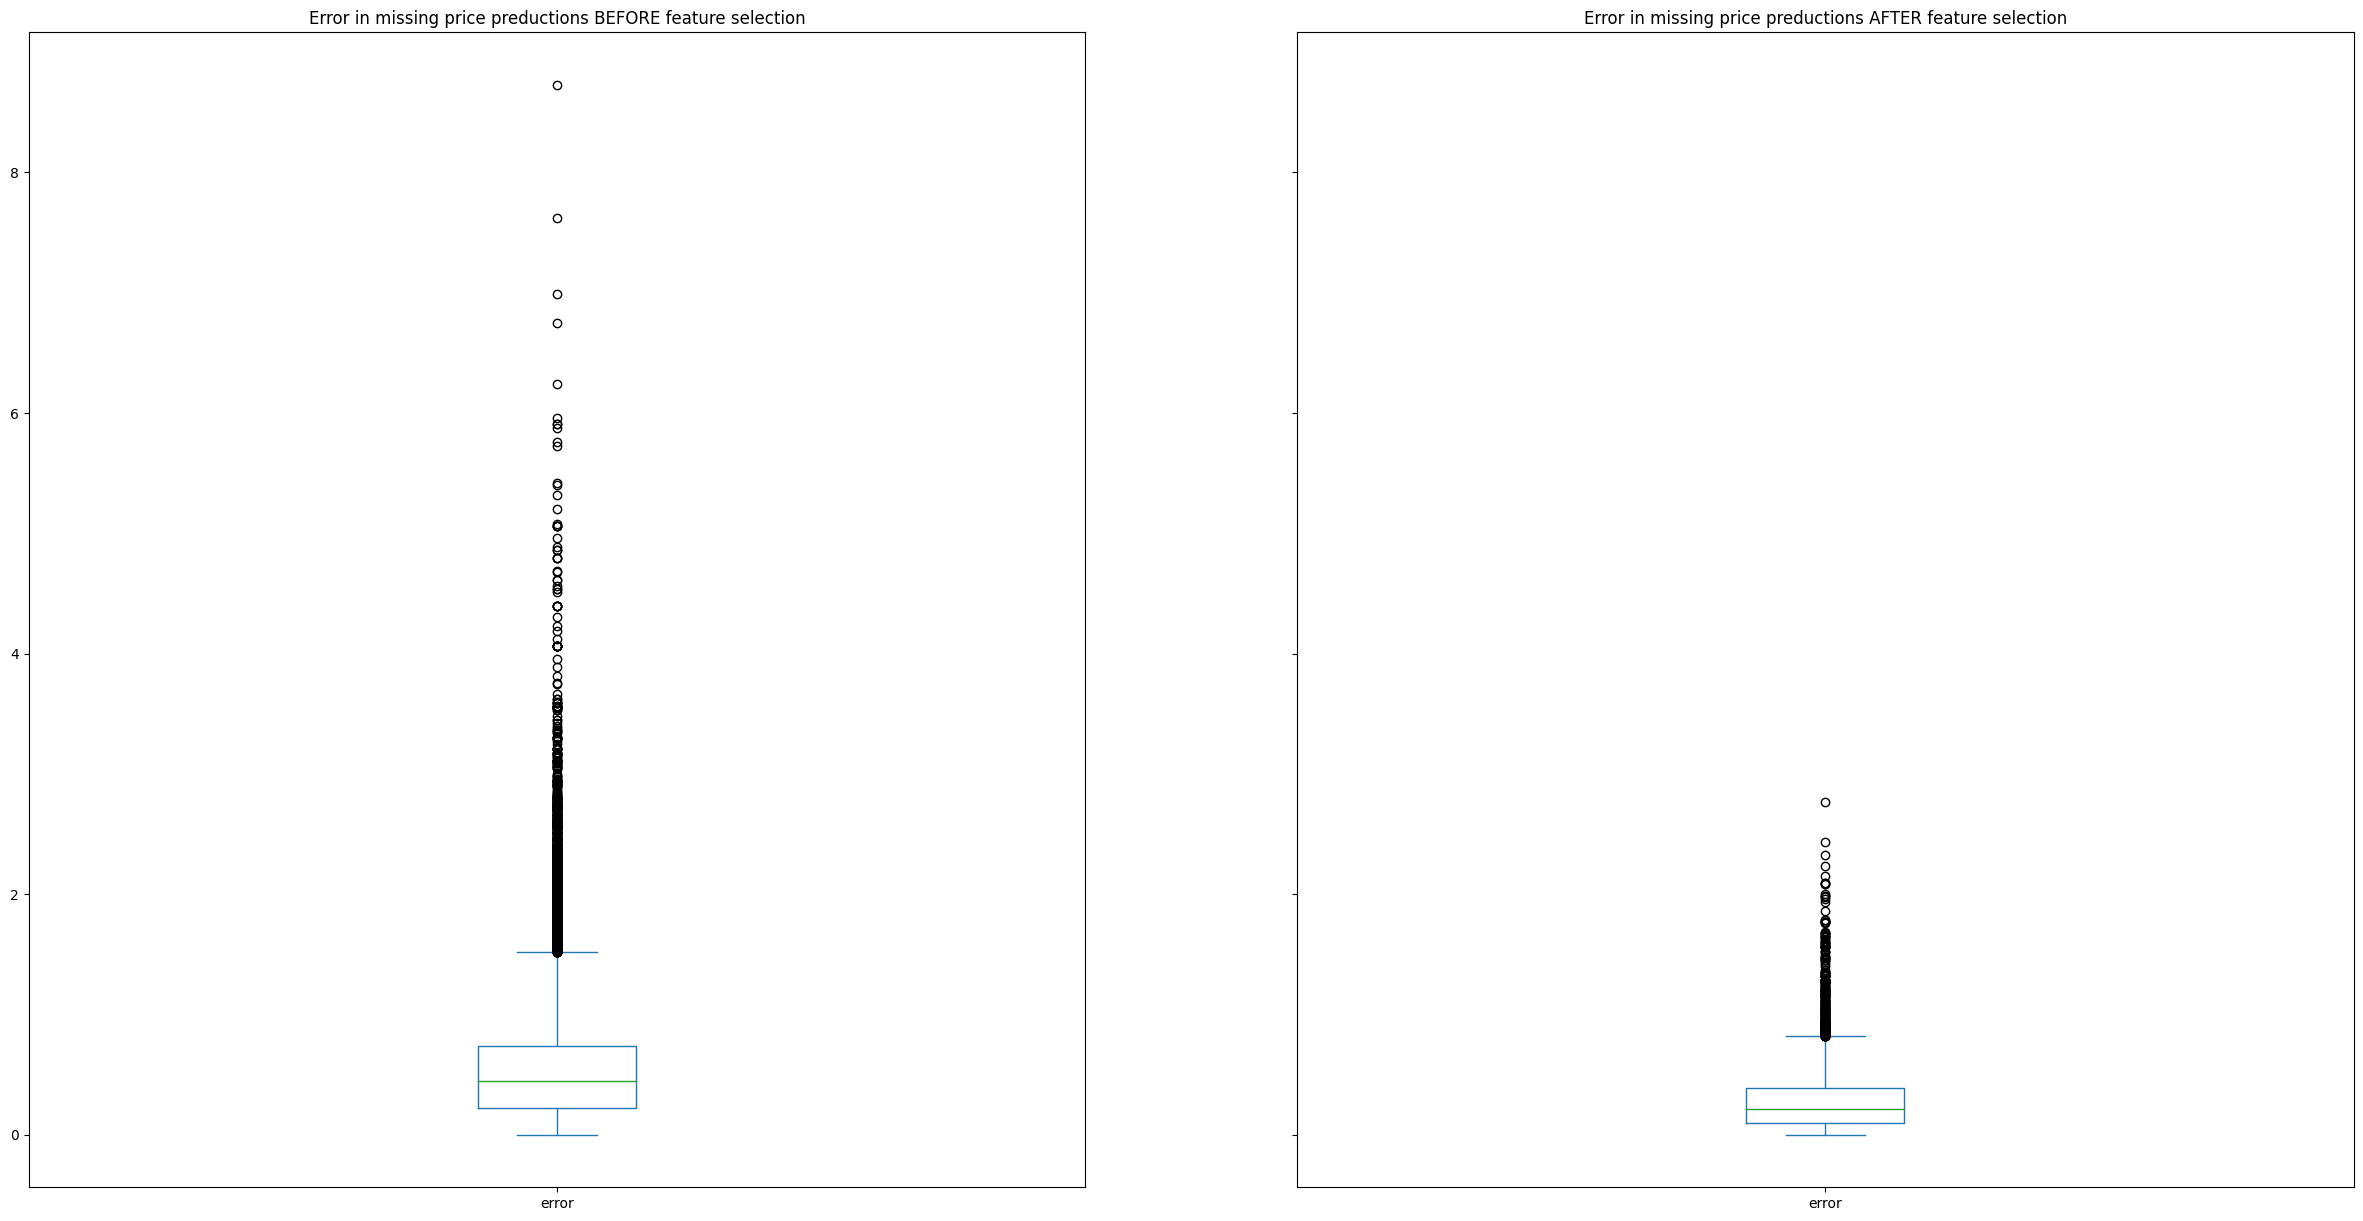

In [45]:
# mean_error_missing_price_before_FS = ((missing_price_results['est_price']-missing_price_results['pred_price'])/(missing_price_results['est_price'])).mean()
mean_error_missing_price_before_FS = missing_price_results['error'].mean()
mean_error_missing_price_after_FS = missing_price_fs_results['error'].mean()
display(pd.DataFrame({'mean_error_missing_price_before_FS': [mean_error_missing_price_before_FS], 'mean_error_missing_price_after_FS': [mean_error_missing_price_after_FS]}))

fig, axs = plt.subplots(1, 2, figsize=(30,15), sharey='row')
missing_price_results[['error']].plot.box(ax=axs[0], title='Error in missing price preductions BEFORE feature selection') 
missing_price_fs_results[['error']].plot.box(ax=axs[1], title='Error in missing price preductions AFTER feature selection') 

We do the same thing for outlying **price** values. We re-predict and compare the change in mean errors prior to and after feature selection and hyperparameter-tuning.

In [46]:
# forecast the rows with outlier price
outliers_price_fs_encoded = outliers_price_encoded.loc[:, ['year', 'miles',  'make_LE', 'model_LE', 'body_type_LE', 'vehicle_type_FE', 'drivetrain_FE']]
outliers_price_fs_X = scale_entire_dataset(outliers_price_fs_encoded, [RobustScaler()])[0]

# # predict
outliers_price_fs_y = model.predict(outliers_price_fs_X)
outliers_price_fs_results = pd.DataFrame({'make':outliers_price['make'], 'model':outliers_price['model'], 'est_price': outliers_price['price'], 'pred_price': outliers_price_fs_y}, index=outliers_price_fs_encoded.index)
outliers_price_fs_results['error'] = abs(outliers_price_fs_results['est_price']-outliers_price_fs_results['pred_price'])/(outliers_price_fs_results['est_price'])
display(outliers_price_fs_results) 

,make,model,est_price,pred_price,error
id,,,,,
0fd1e468-48c8,Ford,F-150,58432.0,25216.088181,0.568454
e6adcd46-fb74,Ford,F-150,58432.0,21685.217678,0.628881
317f5475-fb34,Ford,F-150,58432.0,22750.621653,0.610648
333c7bfa-a0a3,Ford,F-150,58432.0,23626.230213,0.595663
719a21c5-194a,Ford,F-150,58432.0,26129.469639,0.552823
...,...,...,...,...,...
420ed343-ca7e,Land Rover,Range Rover Evoque,57900.0,40575.207247,0.299219
50a2d043-54be,Land Rover,Range Rover Evoque,57900.0,38628.771620,0.332836
4d4525cf-b98d,Land Rover,Range Rover Evoque,57900.0,37022.075526,0.360586


,mean_error_outliers_price_before_FS,mean_error_outliers_price_after_FS
0,0.604489,0.490809


<AxesSubplot: title={'center': 'Error in outliers price predictions AFTER feature selection'}>

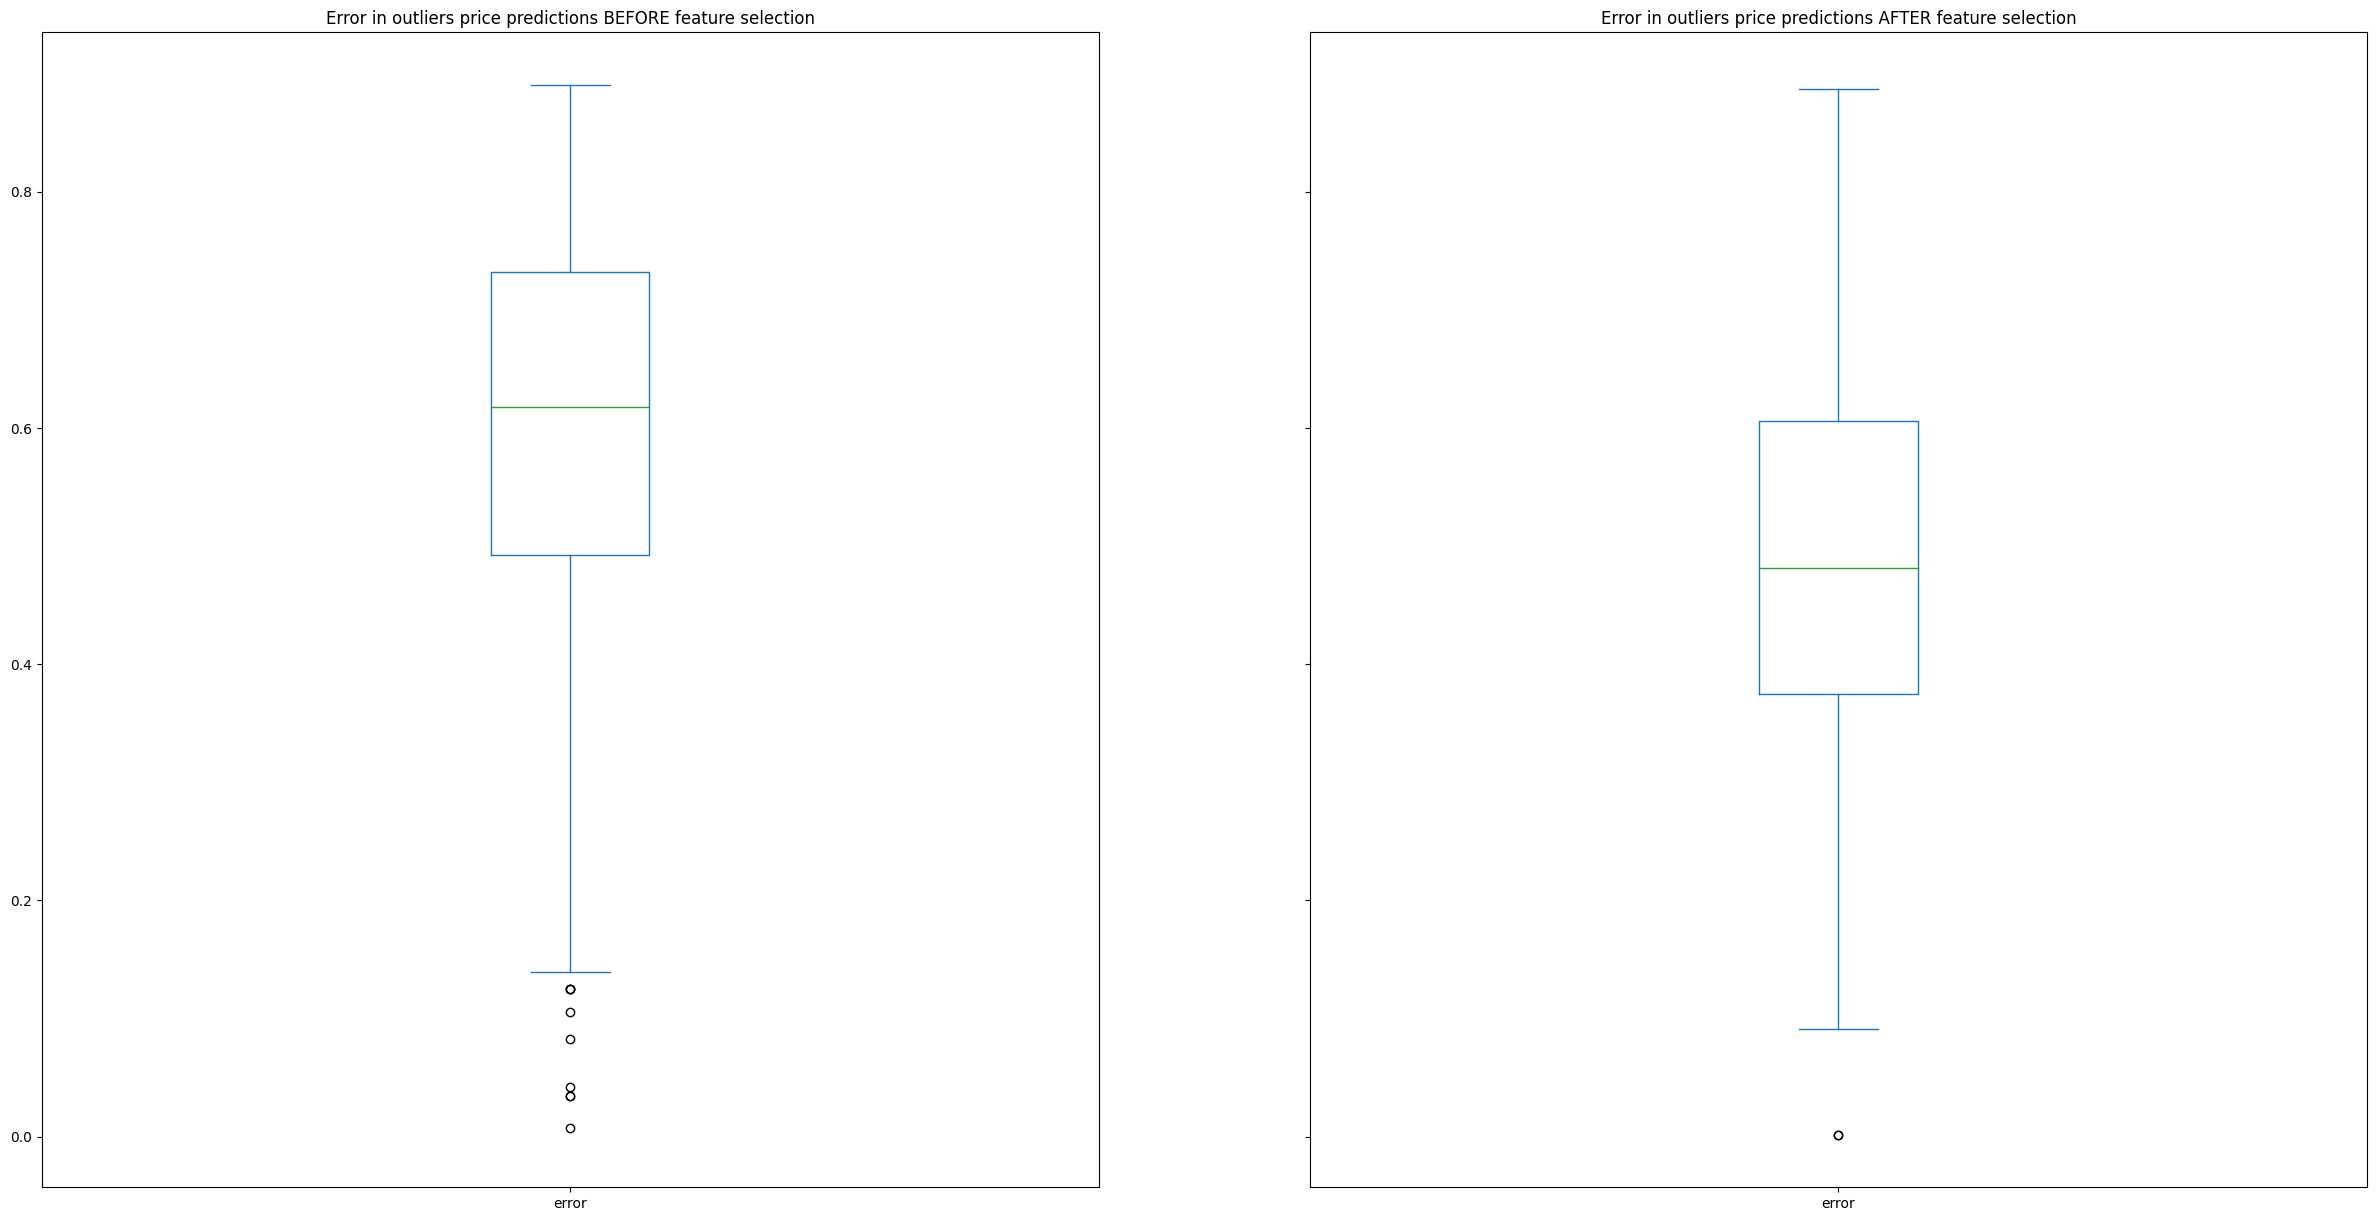

In [47]:
mean_error_outliers_price_before_FS = outliers_price_results['error'].mean()
mean_error_outliers_price_after_FS = outliers_price_fs_results['error'].mean()
display(pd.DataFrame({'mean_error_outliers_price_before_FS': [mean_error_outliers_price_before_FS], 'mean_error_outliers_price_after_FS': [mean_error_outliers_price_after_FS]}))

fig, axs = plt.subplots(1, 2, figsize=(30,15), sharey='row')
outliers_price_results[['error']].plot.box(ax=axs[0], title='Error in outliers price predictions BEFORE feature selection') 
outliers_price_fs_results[['error']].plot.box(ax=axs[1], title='Error in outliers price predictions AFTER feature selection')

#### **Filtering - Univariate Feature Selection for engine_size**

We perform a similar feature selection analysis on the **engine_size** attribute.

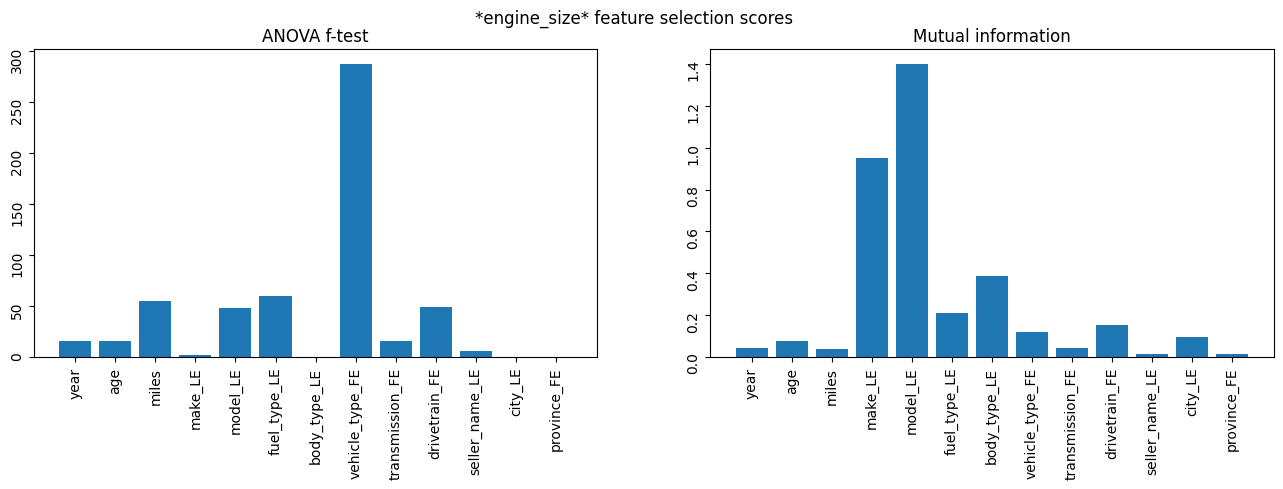

In [48]:
# feature selection for engine_size (using filtering method)
engine_size_y = df_encoded['engine_size']
fs = select_features(X, engine_size_y, f_regression)
mi = select_features(X, engine_size_y, mutual_info_regression)
plot_selection_scores(fs, mi, (df_encoded.drop(columns=['vin', 'price', 'engine_size'])).columns, '*engine_size* feature selection scores')

From the graphs above, these are the most correlated attributes:
* **make_LE**
* **model_LE**
* **fuel_type_LE**
* **body_type_LE**
* **vehicle_type_FE**
* **transmission_FE**
* **drivetrain_FE**

Consequently, for forecasting the **engine_size**, we train and fit our model using only on these attributes. We also perform hyperparameter tuning here.

In [49]:
df_fs_engine_size = df_encoded.loc[:, ['make_LE', 'model_LE', 'fuel_type_LE', 'body_type_LE', 'vehicle_type_FE', 'transmission_FE', 'drivetrain_FE']]
df_fs_scaled_engine_size = scale_entire_dataset(df_fs_engine_size, [RobustScaler()])[0]

target_engine_size_y = df_encoded['engine_size']

hp_tuning_res = grid_search(df_fs_scaled_engine_size, target_price_y, KNeighborsRegressor(), grid_params)

Fitting 5 folds for each of 174 candidates, totalling 870 fits
Best Params: {'metric': 'euclidean', 'n_neighbors': 19, 'weights': 'uniform'}


##### **GridSearch - Hyperparameter-tuning on KNRegressor for engine_size**

Accordingly, we adjust and train our KNRegressor model based on the fine-tuned hyperparameters obtained from our GridSearch.

In [50]:
scores_engine_size_fs = run_models([df_fs_scaled_engine_size], ['RobustScalerFS'], [KNeighborsRegressor(metric=hp_tuning_res['metric'], n_neighbors=hp_tuning_res['n_neighbors'], weights=hp_tuning_res['weights'])], ['KNRegressorFS'], target_engine_size_y, 10, 3, default_scorer=True)

From the plots below, we see an improvement in the mean and median r2 scores after feature selection and fine-tuning of our model's parameters.

**engine_size** model scores prior to feature selection


,RobustScaler-KNRegressor
mean,0.348838
median,0.352107


**engine_size** model scores after feature selection


,RobustScalerFS-KNRegressorFS
mean,0.599852
median,0.602769


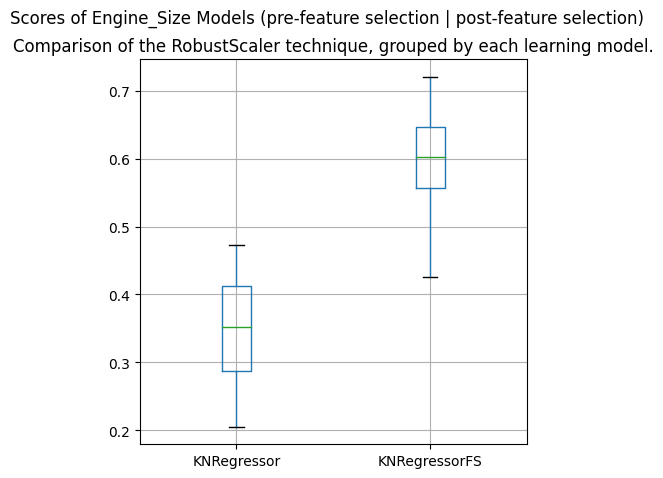

In [51]:
print('**engine_size** model scores prior to feature selection')
print_stats(scores_engine_size, ['RobustScaler'], ['KNRegressor'])
print('**engine_size** model scores after feature selection')
print_stats(scores_engine_size_fs, ['RobustScalerFS'], ['KNRegressorFS'])
compare = {}
compare['RobustScaler'] = (scores_engine_size['RobustScaler']|scores_engine_size_fs['RobustScalerFS'])
plot_results_by_scaler(compare, ['RobustScaler'], ['KNRegressor', 'KNRegressorFS'], 'Scores of Engine_Size Models (pre-feature selection | post-feature selection)')

Once again, using our obtained hyperparameters for our model and each attribute, and using the most relevant features obtained from the Univariate Feature Seletion approach, we predict our missing values and outliers.

In [52]:
target_engine_size_y = df_encoded['engine_size'].to_numpy()
model = KNeighborsRegressor(metric=hp_tuning_res['metric'], n_neighbors=hp_tuning_res['n_neighbors'], weights=hp_tuning_res['weights'])
model.fit(df_fs_scaled_engine_size, target_engine_size_y)

# forecast the rows with missing engine_size
missing_engine_size_fs_encoded = missing_engine_size_encoded.loc[:, ['make_LE', 'model_LE', 'fuel_type_LE', 'body_type_LE', 'vehicle_type_FE', 'transmission_FE', 'drivetrain_FE']]
missing_engine_size_fs_X = scale_entire_dataset(missing_engine_size_fs_encoded, [RobustScaler()])[0]

# predict
missing_engine_size_fs_y = model.predict(missing_engine_size_fs_X)
missing_engine_size_fs_results = pd.DataFrame({'make':missing_engine_size['make'], 'model':missing_engine_size['model'], 'est_engine_size': missing_engine_size['engine_size'], 'pred_engine_size': missing_engine_size_fs_y}, index=missing_engine_size_fs_encoded.index)
missing_engine_size_fs_results['error'] = abs(missing_engine_size_fs_results['est_engine_size'] - missing_engine_size_fs_results['pred_engine_size'])/missing_engine_size_fs_results['est_engine_size']
display(missing_engine_size_fs_results)      

,make,model,est_engine_size,pred_engine_size,error
id,,,,,
d295eb75-3688,Chevrolet,Volt,2.0,2.105263,0.052632
a0dd2860-aac1,Toyota,Mirai,2.0,2.136842,0.068421
78af3839-df97,Toyota,Mirai,2.0,2.136842,0.068421
835fe8e0-1394,Toyota,Mirai,2.0,2.136842,0.068421
4b77942b-0ce6,Toyota,Mirai,2.0,2.136842,0.068421
...,...,...,...,...,...
2e0e0037-5533,Chevrolet,Corvette,3.0,1.610526,0.463158
caec39a0-c733,Mercedes-Benz,C-Class,2.0,2.110526,0.055263
f8c8f411-8baf,Mercedes-Benz,SLC Roadster,2.7,2.168421,0.196881


As observed below, the error in predictions for the missing **engine_size** values worsened after feature selection, but from the box plot, it's clear that the errors in predictions prior to feature selection have significantly more outliers than after feature selection. So, in a sense, we can actually better trust the results of our predictions after feature selection.

,mean_error_missing_engine_size_before_FS,mean_error_missing_engine_size_after_FS
0,0.402031,0.317809


<AxesSubplot: title={'center': 'Error in missing engine_size predictions AFTER feature selection'}>

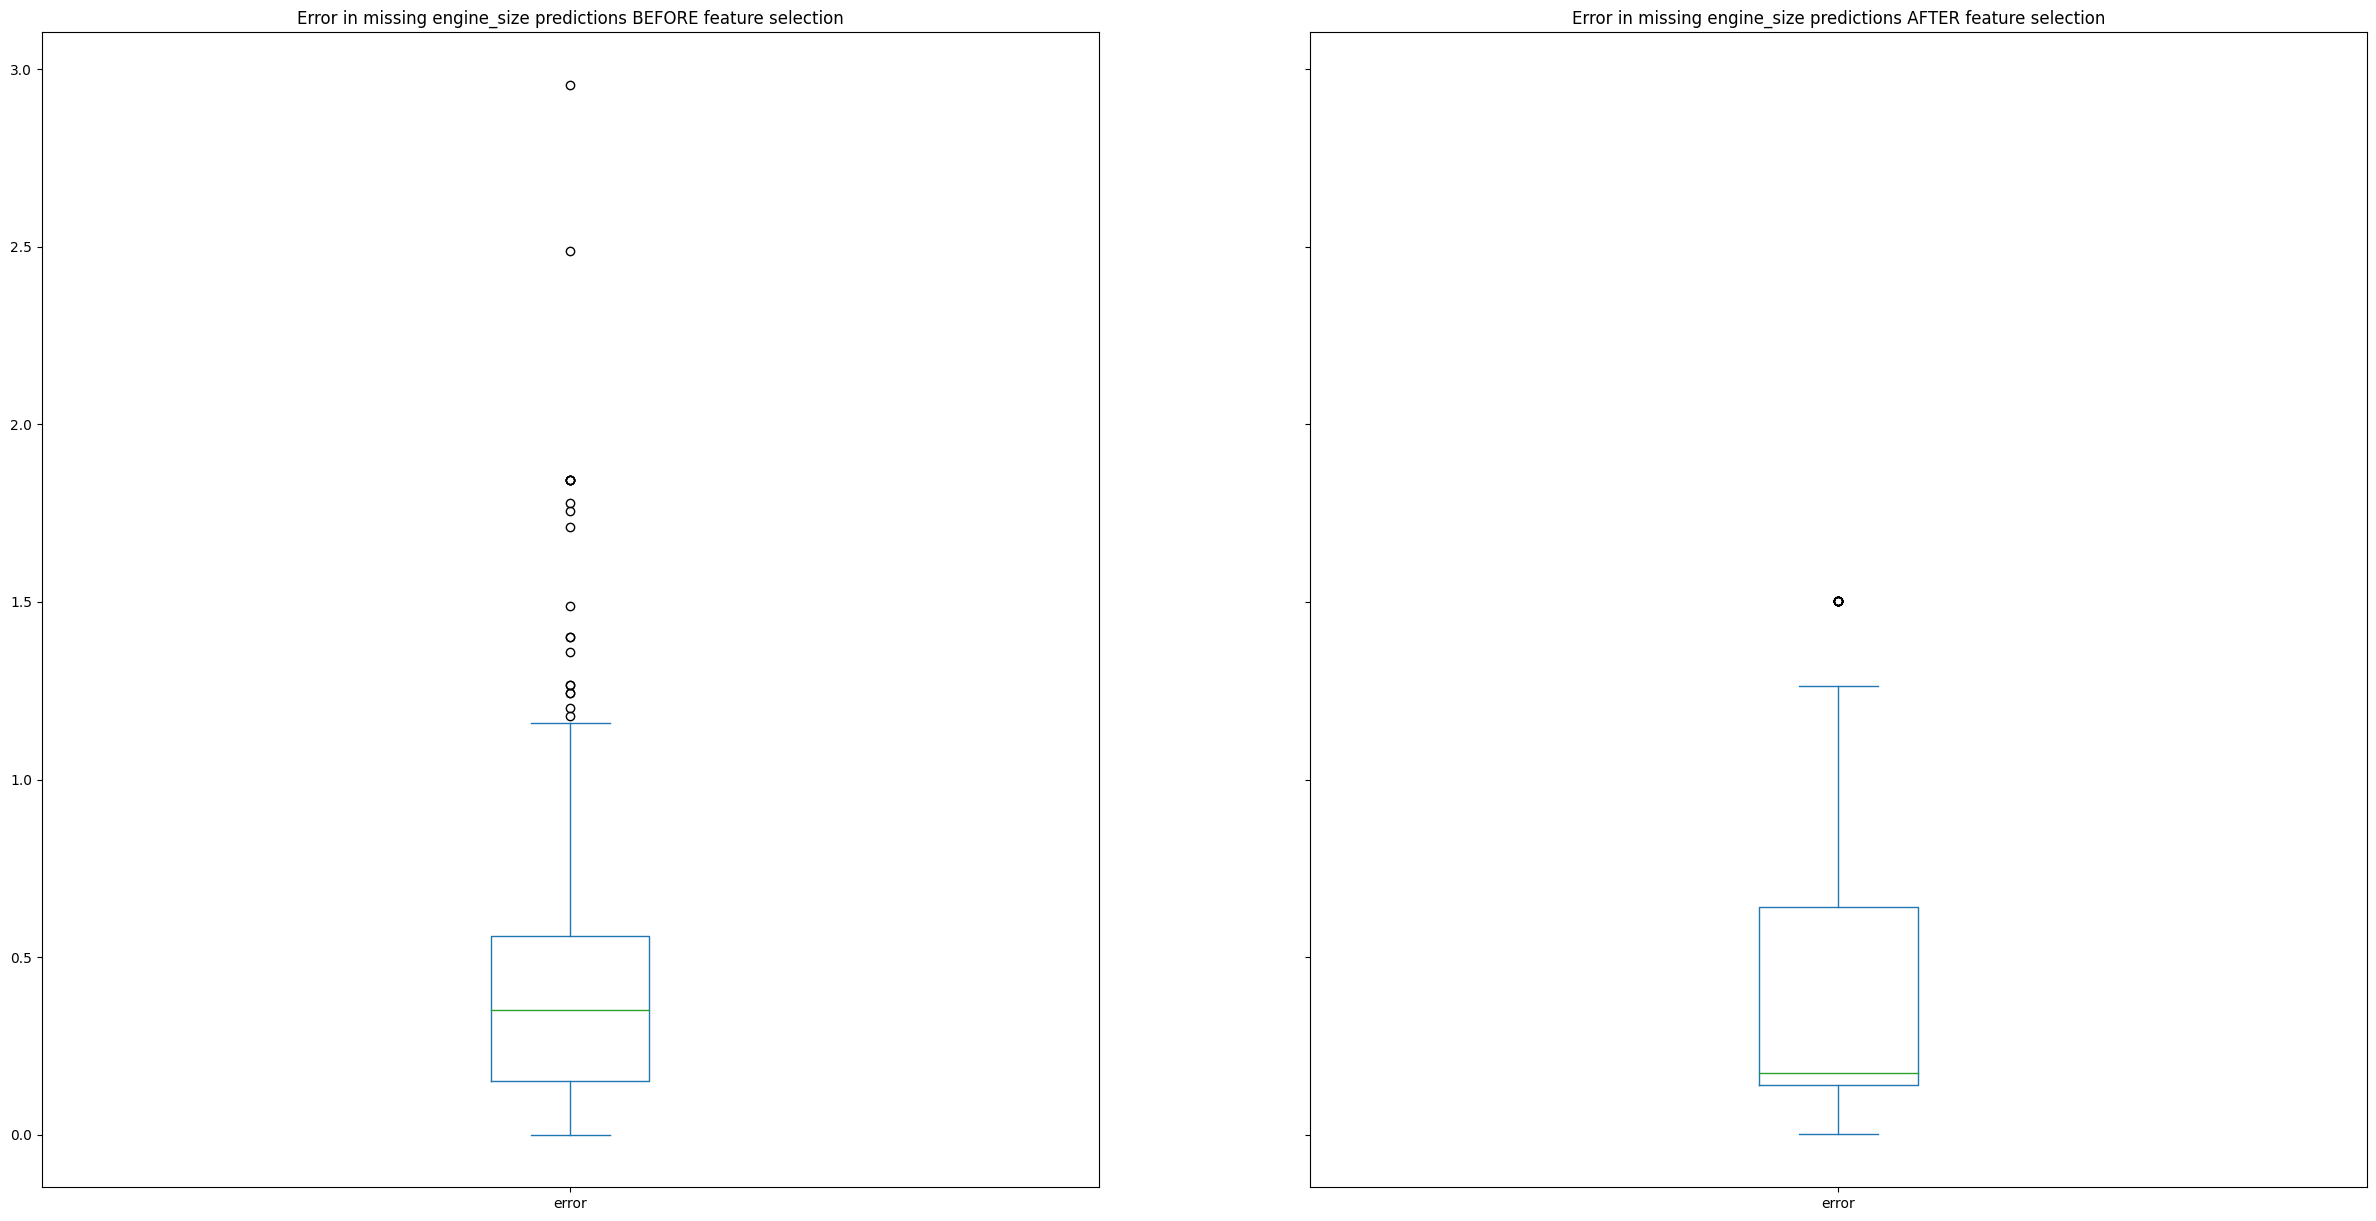

In [53]:
mean_error_missing_engine_size_before_FS = missing_engine_size_results['error'].mean()
mean_error_missing_engine_size_after_FS = missing_engine_size_fs_results['error'].mean()
display(pd.DataFrame({'mean_error_missing_engine_size_before_FS': [mean_error_missing_engine_size_before_FS], 'mean_error_missing_engine_size_after_FS': [mean_error_missing_engine_size_after_FS]}))

fig, axs = plt.subplots(1, 2, figsize=(30,15), sharey='row')
missing_engine_size_results[['error']].plot.box(ax=axs[0], title='Error in missing engine_size predictions BEFORE feature selection') 
missing_engine_size_fs_results[['error']].plot.box(ax=axs[1], title='Error in missing engine_size predictions AFTER feature selection') 

And finally, we re-predict the outlying **engine_size** values and report whether or not there was an improvement.

In [54]:
# forecast the rows with outlier engine_size
outliers_engine_size_fs_encoded = outliers_engine_size_encoded.loc[:, ['make_LE', 'model_LE', 'fuel_type_LE', 'body_type_LE', 'vehicle_type_FE', 'transmission_FE', 'drivetrain_FE']]
outliers_engine_size_fs_X = scale_entire_dataset(outliers_engine_size_fs_encoded, [RobustScaler()])[0]

# predict
outliers_engine_size_fs_y = model.predict(outliers_engine_size_fs_X)
outliers_engine_size_fs_results = pd.DataFrame({'make':outliers_engine_size['make'], 'model':outliers_engine_size['model'], 'est_engine_size': outliers_engine_size['engine_size'], 'pred_engine_size': outliers_engine_size_fs_y}, index=outliers_engine_size_fs_encoded.index)
outliers_engine_size_fs_results['error'] = (outliers_engine_size_fs_results['est_engine_size'] - outliers_engine_size_fs_results['pred_engine_size'])/outliers_engine_size_fs_results['est_engine_size']
display(outliers_engine_size_fs_results)      

,make,model,est_engine_size,pred_engine_size,error
id,,,,,
122b168b-003b,Chevrolet,Express Passenger,5.6,3.110526,0.444549
d7007f7a-10e9,Chevrolet,Express Passenger,5.6,3.110526,0.444549
0a5ecad3-aa7d,Chevrolet,Silverado 2500HD,5.7,2.210526,0.612188
1a66c20f-73f4,Chevrolet,Silverado 2500HD,5.7,2.210526,0.612188
62ac577a-94ef,Chevrolet,Silverado 2500HD,5.7,2.210526,0.612188
...,...,...,...,...,...
d311b131-7c4b,Chevrolet,Silverado 1500,5.7,2.652632,0.534626
971440de-e1c7,Chevrolet,Silverado 1500,5.7,2.652632,0.534626
3d53551c-e172,Chevrolet,Silverado 1500,5.7,2.652632,0.534626


As seen below, the mean error in prediction dropped slightly, but was not as drastic as the one observed for **price**.

,mean_error_outliers_engine_size_before_FS,mean_error_outliers_engine_size_after_FS
0,0.565517,0.540296


<AxesSubplot: title={'center': 'Error in outliers engine_size predictions AFTER feature selection'}>

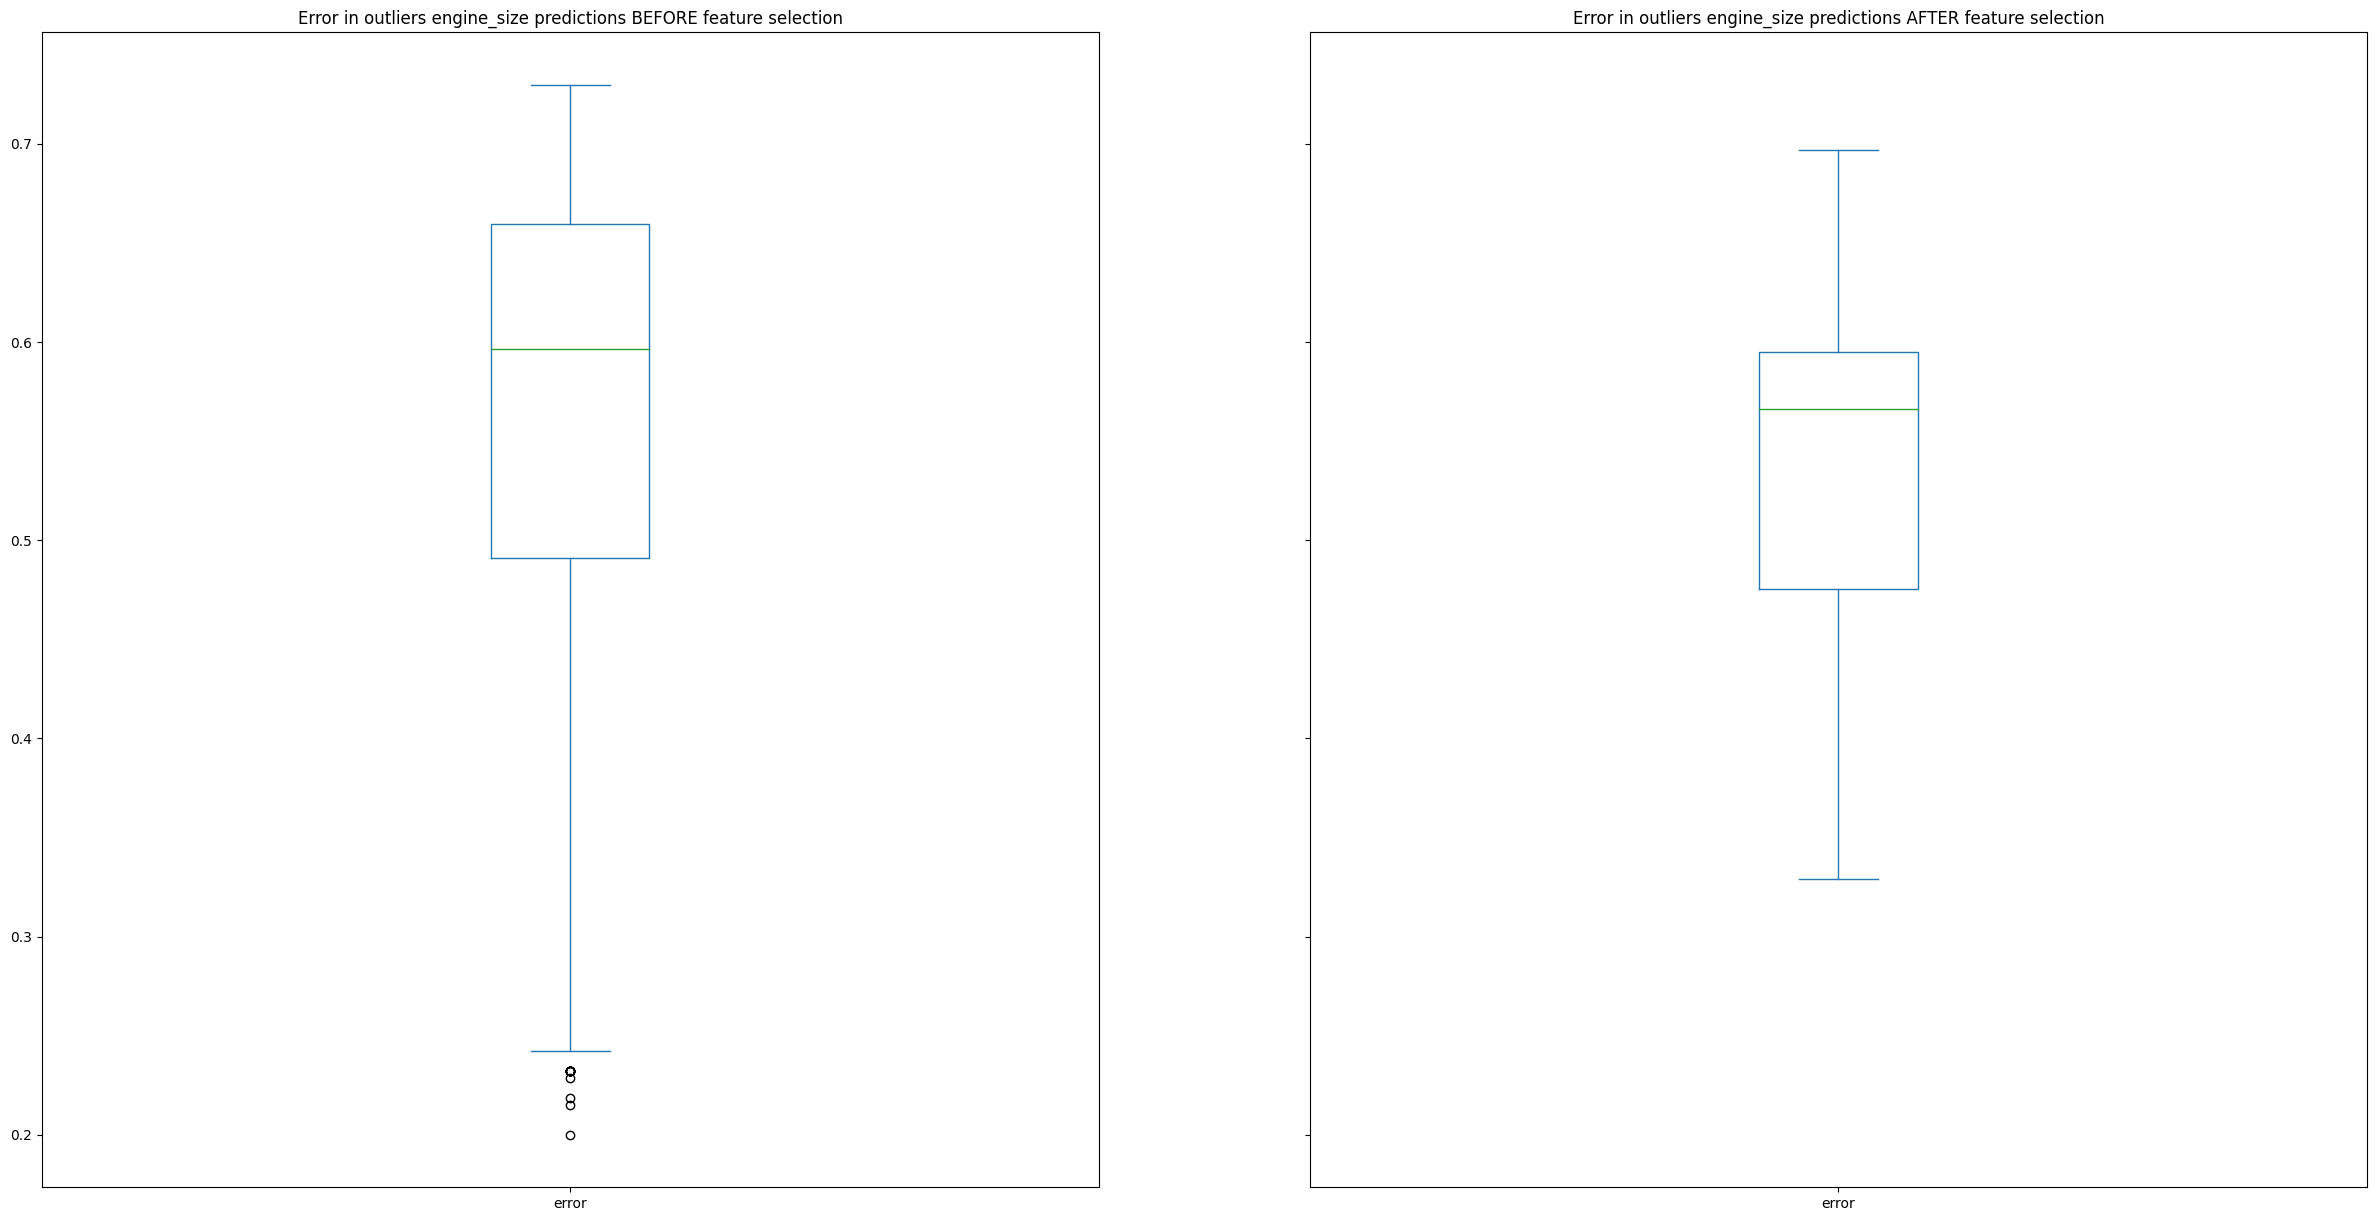

In [55]:
mean_error_outliers_engine_size_before_FS = outliers_engine_size_results['error'].mean()
mean_error_outliers_engine_size_after_FS = outliers_engine_size_fs_results['error'].mean()
display(pd.DataFrame({'mean_error_outliers_engine_size_before_FS': [mean_error_outliers_engine_size_before_FS], 'mean_error_outliers_engine_size_after_FS': [mean_error_outliers_engine_size_after_FS]}))

fig, axs = plt.subplots(1, 2, figsize=(30,15), sharey='row')
outliers_engine_size_results[['error']].plot.box(ax=axs[0], title='Error in outliers engine_size predictions BEFORE feature selection') 
outliers_engine_size_fs_results[['error']].plot.box(ax=axs[1], title='Error in outliers engine_size predictions AFTER feature selection') 